In [1]:
import glob
import tifffile
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import *
#from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
from os import listdir
from os.path import isfile, join
from sklearn.manifold import TSNE

import re
%matplotlib notebook

# Load Data/Labels

In [2]:
python_data_path= r"Y:\coskun-lab\Shambavi\Paper\Data\Main Data\Python Data"
results_store_path = r"Y:\coskun-lab\Shambavi\Paper\Results\3D_TOF_SIMS\Results_Today"

In [3]:
python_data_path= r"Y:\coskun-lab\Shambavi\Paper\Data\Main Data\Python Data"
os.chdir(python_data_path)

In [4]:
pv = np.load('pixel_unlabelled_zero.npy',allow_pickle=True)
px = np.load('pixel_unlabelled_zero_x.npy',allow_pickle=True)
py = np.load('pixel_unlabelled_zero_y.npy',allow_pickle=True)
pz = np.load('pixel_unlabelled_zero_z.npy',allow_pickle=True)

In [5]:
pv_count = np.load('pixel_unlabelled_nonzero.npy',allow_pickle=True)
px_count = np.load('pixel_unlabelled_nonzero_x.npy',allow_pickle=True)
py_count = np.load('pixel_unlabelled_nonzero_y.npy',allow_pickle=True)
pz_count = np.load('pixel_unlabelled_nonzero_z.npy',allow_pickle=True)

In [6]:

labels = np.load('unlabelled_tissue_labels.npy',allow_pickle=True)

In [53]:
for i,type in enumerate(labels):
    print(i,type)

0 63.5559
1 72.9073
2 73.9262
3 PO_3-
4 SiH_9N_3-
5 SO_3-
6 frag
7 SO_4-
8 96.836
9 PO_4-
10 H-
11 108.886
12 S_2O_3-
13 116.865
14 117.813
15 120.852
16 121.817
17 124.856
18 Si_3H_3SN-
19 SiH_2SN_4O-
20 144.896
21 O-
22 145.83
23 SiCH_5SN_4O-
24 149.848
25 154.764
26 158.778
27 C_9H_9Ti-
28 C_12H_22-
29 C_11H_23O-
30 173.746
31 head
32 OH-
33 191.709
34 H_11O_5Al_4-
35 200.669
36 207.613
37 208.694
38 H_7O_2Al_3F_5-
39 216.758
40 C_14H_24O_2-
41 C_2H_3Au-
42 C_14H_27O_2-
43 Cl-
44 Na_3S_2O_6-
45 237.721
46 Mg_4SO_7-
47 C_13H_23O_4-
48 C_14H_13O_4-
49 C_15H_20O_3-
50 Acid
51 C_18H_37O-
52 fragment-R-CO-H
53 Frag
54 41.9271
55 268.658
56 270.299
57 C_12H_8N_2O_6-
58 C_18H_36O_2-
59 BaP_2O_6-
60 C_18H_38NO_2-
61 Y_2VO_5-
62 CsTa-
63 C_19H_42NO_2-
64 C_3N-
65 CsWO-
66 C_7H_4SOAu-
67 Se_3H_5O_6-
68 343.737
69 Fe_5O_5-
70 2
71 C_8F_15-
72 1
73 C_3H_8S_2O_4As_3-
74 chain
75 SO_2-


# Selection of Compounds 

In [54]:
#print("Zeros in layer {}: {}".format(k, zeros/(w*h)))
c1 = 2 #73.92
c2 = 3 #PO3
c3 = 64 #C_3N-
c4 = 5 #SO3 #chain
c5 = 65 #CSWO-
X = pd.DataFrame({'C1': list(pv[c1]), 'C2': list(pv[c2]),'C3': list(pv[c3]),'C4' : list(pv[c4]),'C5' : list(pv[c5])})#,'Column4': x_count, 'Column5': y_count,'Column6': z_count})

In [9]:
# #print("Zeros in layer {}: {}".format(k, zeros/(w*h)))
# c1 = 26 #Cl-
# c2 = 41 #42
# c3 = 93 #CHSNO
# c4 = 75 #SO3
# X = pd.DataFrame({'C1': list(pv[c1]), 'C2': list(pv[c2]),'C3': list(pv[c3]),'C4' : list(pv[c4])})#,'Column4': x_count, 'Column5': y_count,'Column6': z_count})

# K-Means

In [10]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized) 
kmeans = KMeans(n_clusters=6, random_state=111)
kmeans.fit(X_normalized)
kmeans.labels_
kmeans_list = list(kmeans.labels_)
zeros_indices = [i for i, x in enumerate(kmeans_list) if x == 0]    
one_indices = [i for i, x in enumerate(kmeans_list) if x == 1]
two_indices = [i for i, x in enumerate(kmeans_list) if x == 2]
three_indices = [i for i, x in enumerate(kmeans_list) if x == 3]
four_indices = [i for i, x in enumerate(kmeans_list) if x == 4]
five_indices = [i for i, x in enumerate(kmeans_list) if x == 5]

In [11]:
c1_array = np.c_[px_count[c1],py_count[c1],pz_count[c1]]
c2_array = np.c_[px_count[c2],py_count[c2],pz_count[c2]]
c3_array = np.c_[px_count[c3],py_count[c3],pz_count[c3]]
c4_array = np.c_[px_count[c4],py_count[c4],pz_count[c4]]
c5_array = np.c_[px_count[c5],py_count[c5],pz_count[c5]]

In [64]:
def image_stack(pv):
    final= []
    compounds = []
    for i in range(len(pv)):
        final = []
        y = np.split(pv[i,:],len(pv[i,:])/(256*256))
        for j in range(int(len(pv[i,:])/(256*256))):
            final.append(y[j].reshape(256,256))
        compounds.append(final)
    return compounds

<IPython.core.display.Javascript object>


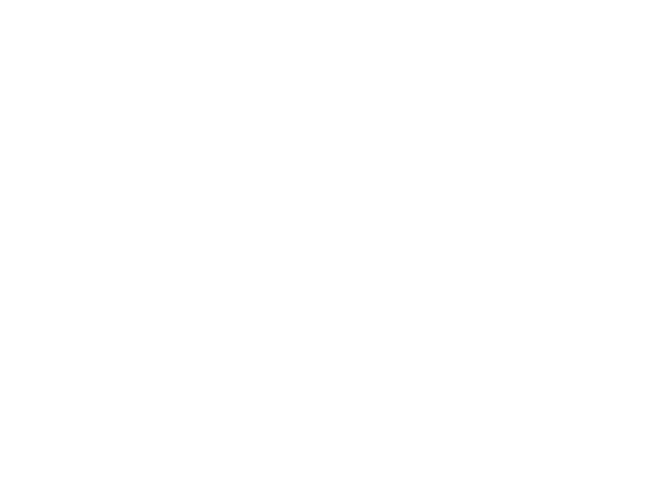

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'function' object has no attribute 'pltfig'

In [82]:
hi = image_stack(pv)
fig = plt.figure()
plt.show(np.sum(hi[5],axis = 0))
save.pltfig('hi.jpg')

In [13]:
os.chdir('Y:\coskun-lab\Shambavi\Paper\Results')

# Plot 3D Visualizations of Compounds

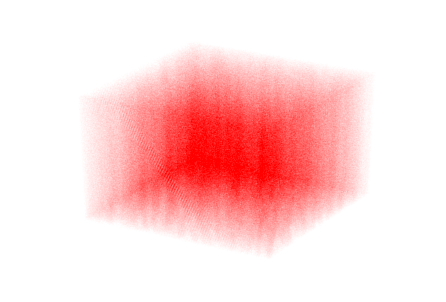

In [14]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c1],py_count[c1],pz_count[c1], c = 'red', s = 0.00035, alpha = 0.1)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("73.png", bbox_inches='tight')
plt.show()

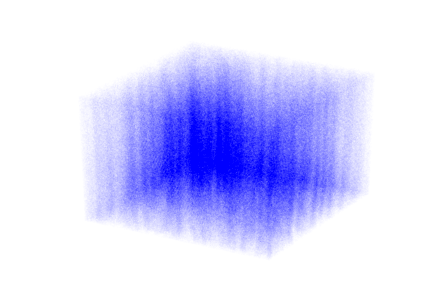

In [15]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c2],py_count[c2],pz_count[c2], c = 'blue', s = 0.0008, alpha = 0.1)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C2.png", bbox_inches='tight')
plt.show()

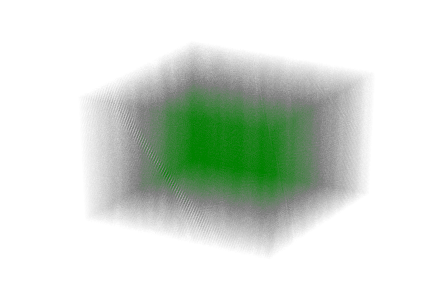

In [15]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c3],py_count[c3],pz_count[c3], c = 'green', s = 0.0004, alpha = 0.08)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C3.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


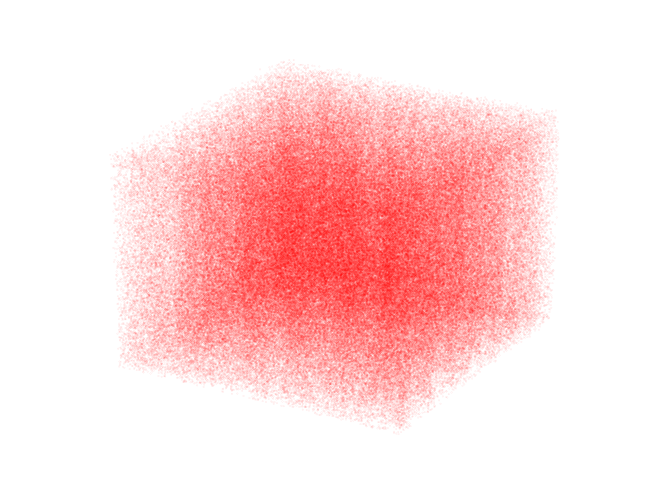

In [58]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c4],py_count[c4],pz_count[c4], c = 'red', s = 0.003, alpha = 0.5)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C4-SO3.png", bbox_inches='tight')
plt.show()

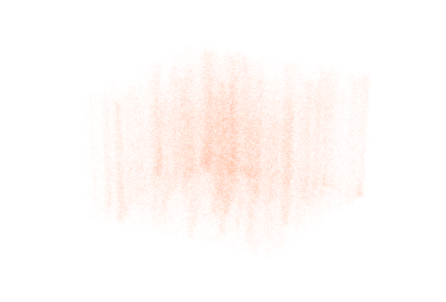

In [21]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c5],py_count[c5],pz_count[c5], c = 'orange', s = 0.0001, alpha = 0.6)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C5.png", bbox_inches='tight')
plt.show()

In [23]:
def array_def(x_list,y_list,z_list,pixel,zeros_indices):
    T,W,V= [x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices]
    zero_array = np.c_[T,W,V]
    pixel = [pixel[i] for i in zeros_indices]
    zero_array_class = np.c_[zero_array,np.ones(len(zero_array))]
    return zero_array,zero_array_class,pixel

In [24]:
zero_array, zero_array_class,pixel_zero_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],zeros_indices)
one_array, one_array_class,pixel_one_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],one_indices)
two_array, two_array_class,pixel_two_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],two_indices)
three_array, three_array_class,pixel_three_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],three_indices)
four_array, four_array_class,pixel_four_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],four_indices)
five_array, five_array_class,pixel_five_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],five_indices)


In [25]:
zero_array, zero_array_class,pixel_zero_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],zeros_indices)
one_array, one_array_class,pixel_one_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],one_indices)
two_array, two_array_class,pixel_two_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],two_indices)
three_array, three_array_class,pixel_three_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],three_indices)
four_array, four_array_class,pixel_four_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],four_indices)
five_array, five_array_class,pixel_five_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],five_indices)

In [26]:
zero_array, zero_array_class,pixel_zero_c3 = array_def(px[c3],py[c3],pz[c3],pv[c3],zeros_indices)
one_array, one_array_class,pixel_one_c3 = array_def(px[c3],py[c3],pz[c3],pv[c3],one_indices)
two_array, two_array_class,pixel_two_c3 = array_def(px[c3],py[c3],pz[c3],pv[c3],two_indices)
three_array, three_array_class,pixel_three_c3 = array_def(px[c3],py[c3],pz[c1],pv[c3],three_indices)
four_array, four_array_class,pixel_four_c3 = array_def(px[c3],py[c3],pz[c1],pv[c3],four_indices)
five_array, five_array_class,pixel_five_c3 = array_def(px[c3],py[c3],pz[c1],pv[c3],five_indices)

In [27]:
zero_array, zero_array_class,pixel_zero_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],zeros_indices)
one_array, one_array_class,pixel_one_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],one_indices)
two_array, two_array_class,pixel_two_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],two_indices)
three_array, three_array_class,pixel_three_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],three_indices)
four_array, four_array_class,pixel_four_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],four_indices)
five_array, five_array_class,pixel_five_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],five_indices)

In [28]:
zero_array, zero_array_class,pixel_zero_c5 = array_def(px[c5],py[c5],pz[c5],pv[c5],zeros_indices)
one_array, one_array_class,pixel_one_c5 = array_def(px[c5],py[c5],pz[c5],pv[c5],one_indices)
two_array, two_array_class,pixel_two_c5 = array_def(px[c5],py[c5],pz[c5],pv[c5],two_indices)
three_array, three_array_class,pixel_three_c5 = array_def(px[c5],py[c5],pz[c5],pv[c5],three_indices)
four_array, four_array_class,pixel_four_c5 = array_def(px[c5],py[c5],pz[c5],pv[c5],four_indices)
five_array, five_array_class,pixel_five_c5 = array_def(px[c5],py[c5],pz[c5],pv[c5],five_indices)

In [29]:
from ordered_set import OrderedSet

x_hashable = map(tuple, zero_array)
zero_set = OrderedSet(x_hashable)

x_hashable = map(tuple, one_array)
one_set = OrderedSet(x_hashable)

x_hashable = map(tuple, two_array)
two_set = OrderedSet(x_hashable)

x_hashable = map(tuple, three_array)
three_set = OrderedSet(x_hashable)

x_hashable = map(tuple, four_array)
four_set = OrderedSet(x_hashable)

x_hashable = map(tuple, five_array)
five_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c1_array)
c1_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c2_array)
c2_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c3_array)
c3_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c4_array)
c4_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c5_array)
c5_set = OrderedSet(x_hashable)

In [30]:
wow_c1_0 = np.array(list(zero_set.intersection(c1_set)))
wow_c1_1 = np.array(list(one_set.intersection(c1_set)))
wow_c1_2 = np.array(list(two_set.intersection(c1_set)))
wow_c1_3 = np.array(list(three_set.intersection(c1_set)))
wow_c1_4 = np.array(list(four_set.intersection(c1_set)))
wow_c1_5 = np.array(list(five_set.intersection(c1_set)))

wow_c2_0 = np.array(list(zero_set.intersection(c2_set)))
wow_c2_1 = np.array(list(one_set.intersection(c2_set)))
wow_c2_2 = np.array(list(two_set.intersection(c2_set)))
wow_c2_3 = np.array(list(three_set.intersection(c2_set)))
wow_c2_4 = np.array(list(four_set.intersection(c2_set)))
wow_c2_5 = np.array(list(five_set.intersection(c2_set)))

wow_c3_0 = np.array(list(zero_set.intersection(c3_set)))
wow_c3_1 = np.array(list(one_set.intersection(c3_set)))
wow_c3_2 = np.array(list(two_set.intersection(c3_set)))
wow_c3_3 = np.array(list(three_set.intersection(c3_set)))
wow_c3_4 = np.array(list(four_set.intersection(c3_set)))
wow_c3_5 = np.array(list(five_set.intersection(c3_set)))

wow_c4_0 = np.array(list(zero_set.intersection(c4_set)))
wow_c4_1 = np.array(list(one_set.intersection(c4_set)))
wow_c4_2 = np.array(list(two_set.intersection(c4_set)))
wow_c4_3 = np.array(list(three_set.intersection(c4_set)))
wow_c4_4 = np.array(list(four_set.intersection(c4_set)))
wow_c4_5 = np.array(list(five_set.intersection(c4_set)))

wow_c5_0 = np.array(list(zero_set.intersection(c5_set)))
wow_c5_1 = np.array(list(one_set.intersection(c5_set)))
wow_c5_2 = np.array(list(two_set.intersection(c5_set)))
wow_c5_3 = np.array(list(three_set.intersection(c5_set)))
wow_c5_4 = np.array(list(four_set.intersection(c5_set)))
wow_c5_5 = np.array(list(five_set.intersection(c5_set)))

In [31]:
def intersect_fn(zero_set,iodine_set,iod_value):
    final_iodine_zero = np.zeros(len(zero_set))
    iod_ordered = zero_set.intersection(iodine_set)
    lol = OrderedSet(iod_ordered).intersection(zero_set)
    iodine_cluster_zero = []
    for i in range(len(lol)):
        final_iodine_zero[zero_set.index(lol[i])] = iod_value[iodine_set.index(lol[i])]
        iodine_cluster_zero.append(iod_value[iodine_set.index(lol[i])])
    return final_iodine_zero, iodine_cluster_zero

In [32]:
final_c1_zero, c1_cluster_zero = intersect_fn(zero_set,c1_set,pv_count[c1])
final_c1_one, c1_cluster_one = intersect_fn(one_set,c1_set,pv_count[c1])
final_c1_two, c1_cluster_two = intersect_fn(two_set,c1_set,pv_count[c1])
final_c1_three, c1_cluster_three = intersect_fn(three_set,c1_set,pv_count[c1])
final_c1_four, c1_cluster_four = intersect_fn(four_set,c1_set,pv_count[c1])
final_c1_five, c1_cluster_five = intersect_fn(five_set,c1_set,pv_count[c1])

In [33]:
final_c2_zero, c2_cluster_zero = intersect_fn(zero_set,c2_set,pv_count[c2])
final_c2_one, c2_cluster_one = intersect_fn(one_set,c2_set,pv_count[c2])
final_c2_two, c2_cluster_two = intersect_fn(two_set,c2_set,pv_count[c2])
final_c2_three, c2_cluster_three = intersect_fn(three_set,c2_set,pv_count[c2])
final_c2_four, c2_cluster_four = intersect_fn(four_set,c2_set,pv_count[c2])
final_c2_five, c2_cluster_five = intersect_fn(five_set,c2_set,pv_count[c2])

In [34]:
final_c3_zero, c3_cluster_zero = intersect_fn(zero_set,c3_set,pv_count[c3])
final_c3_one, c3_cluster_one = intersect_fn(one_set,c3_set,pv_count[c3])
final_c3_two, c3_cluster_two = intersect_fn(two_set,c3_set,pv_count[c3])
final_c3_three, c3_cluster_three = intersect_fn(three_set,c3_set,pv_count[c3])
final_c3_four, c3_cluster_four = intersect_fn(four_set,c3_set,pv_count[c3])
final_c3_five, c3_cluster_five = intersect_fn(five_set,c3_set,pv_count[c3])

In [35]:
final_c4_zero, c4_cluster_zero = intersect_fn(zero_set,c4_set,pv_count[c4])
final_c4_one, c4_cluster_one = intersect_fn(one_set,c4_set,pv_count[c4])
final_c4_two, c4_cluster_two = intersect_fn(two_set,c4_set,pv_count[c4])
final_c4_three, c4_cluster_three = intersect_fn(three_set,c4_set,pv_count[c4])
final_c4_four, c4_cluster_four = intersect_fn(four_set,c4_set,pv_count[c4])
final_c4_five, c4_cluster_five = intersect_fn(five_set,c4_set,pv_count[c4])

In [36]:
final_c4_four, c4_cluster_four = intersect_fn(four_set,c4_set,pv_count[c4])
final_c4_five, c4_cluster_five = intersect_fn(five_set,c4_set,pv_count[c4])

In [37]:
final_c5_zero, c5_cluster_zero = intersect_fn(zero_set,c5_set,pv_count[c5])
final_c5_one, c5_cluster_one = intersect_fn(one_set,c5_set,pv_count[c5])
final_c5_two, c5_cluster_two = intersect_fn(two_set,c5_set,pv_count[c5])
final_c5_three, c5_cluster_three = intersect_fn(three_set,c5_set,pv_count[c5])
final_c5_four, c5_cluster_four = intersect_fn(four_set,c5_set,pv_count[c5])
final_c5_five, c5_cluster_five = intersect_fn(five_set,c5_set,pv_count[c5])

## Heatmap 

In [59]:
final = np.zeros([len(pv),256*256,int(len(np.array(pv[1]))/(256*256))])
for i in range(len(pv)):
    y = np.split(np.array(pv[i]),len(np.array(pv[i]))/(256*256))
    for j in range(int(len(np.array(pv[i]))/(256*256))):
        final[i,:,j] = y[j]

In [60]:
final_mean = np.mean(final, axis = 2)
final_mean_T = final_mean.transpose()
df = pd.DataFrame(data= final_mean_T,columns = labels)
df_zscore = df.copy()

In [62]:
np.shape(final_mean)

(76, 65536)

In [29]:
cols = list(df_zscore.columns)
for col in cols:
    #col_zscore = col + '_zscore'
    df_zscore[col] = (df_zscore[col] - df_zscore[col].mean())/df_zscore[col].std(ddof=0)

<IPython.core.display.Javascript object>


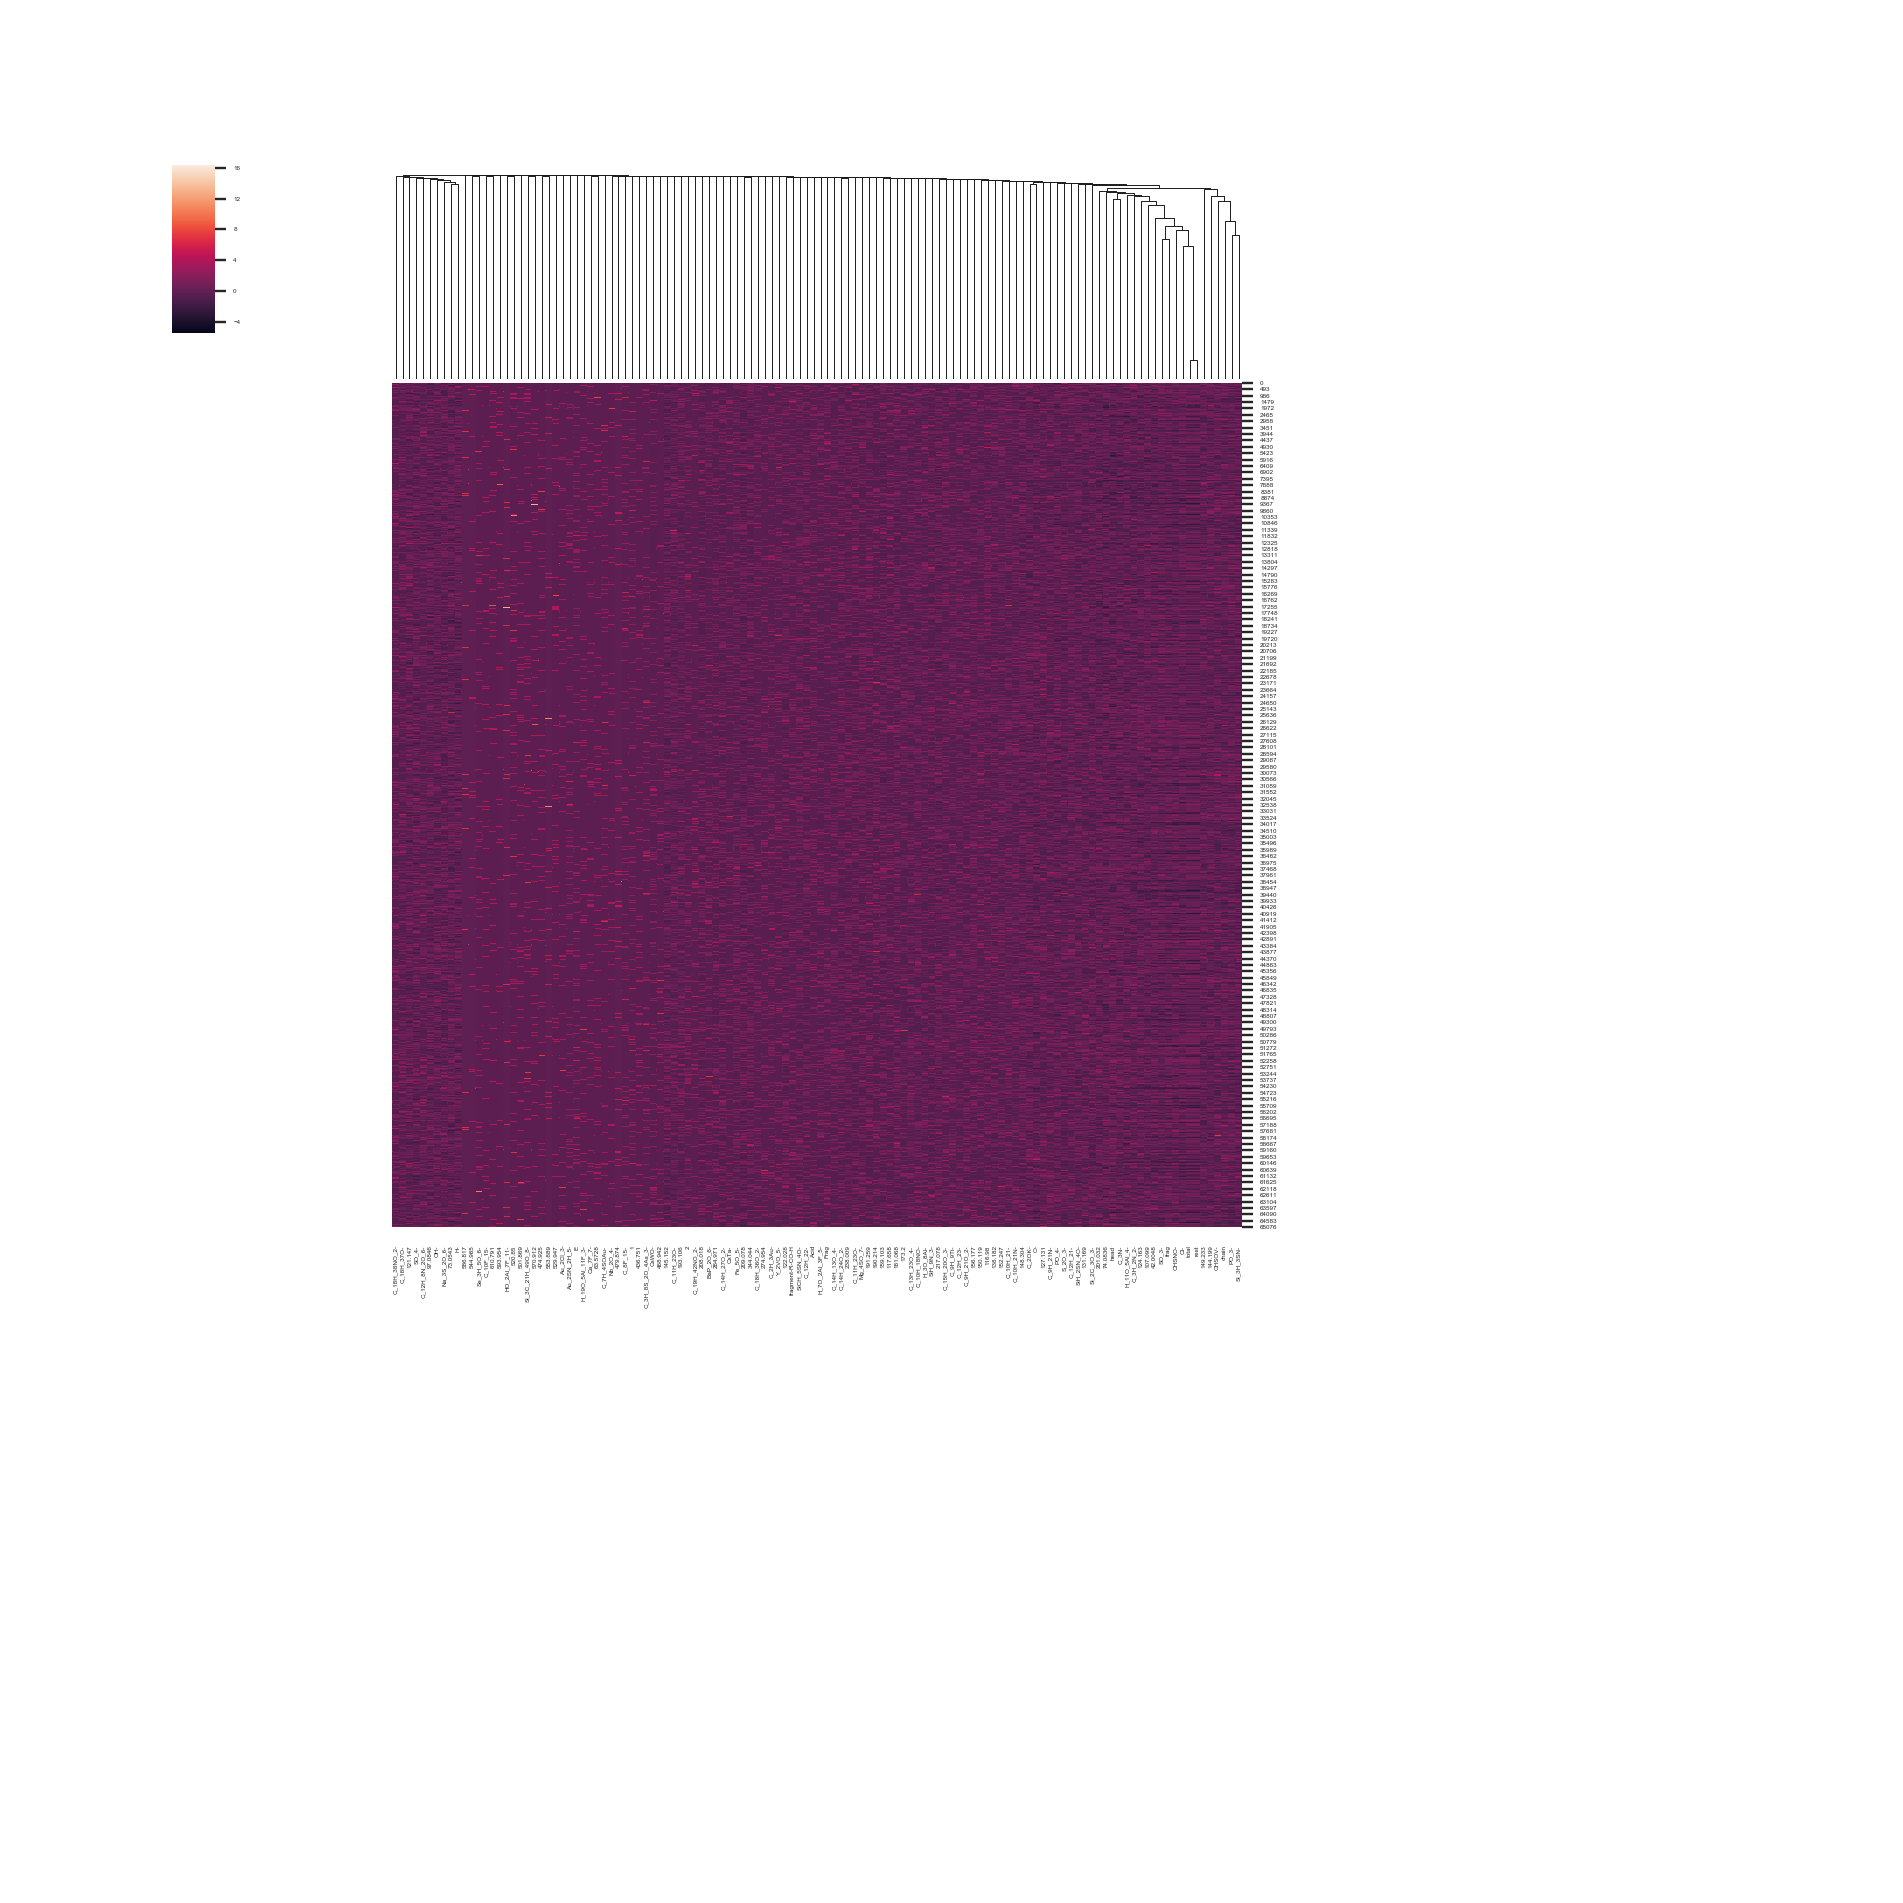

In [45]:
%matplotlib notebook
sns.set(font_scale=0.30)
# fig = plt.figure()
g = sns.clustermap(df_zscore, row_cluster=False)#, xticklabels = labels, yticklabels = labels, square = True )
plt.savefig('clustermap_out_germinal_zscore_column_cluster.png',format='png', dpi=1200)

<IPython.core.display.Javascript object>


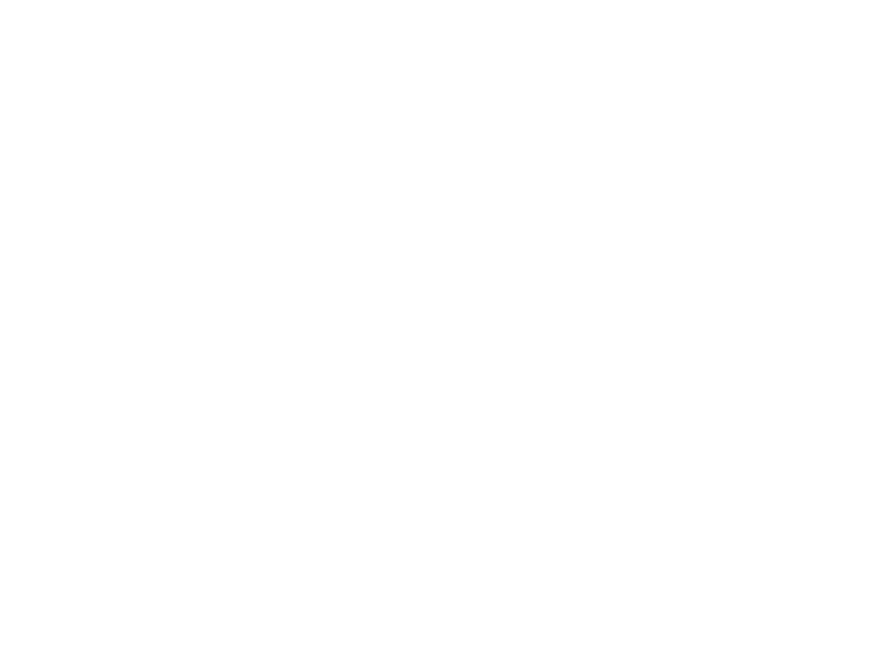

In [31]:
%matplotlib notebook
sns.set(font_scale=0.20)
# fig = plt.figure()
g = sns.heatmap(df_zscore, xticklabels = labels, yticklabels = labels, square = True )
plt.savefig('heatmap_out_germinal_slices_cm1_zscore.png',format='png', dpi=1200)

<IPython.core.display.Javascript object>


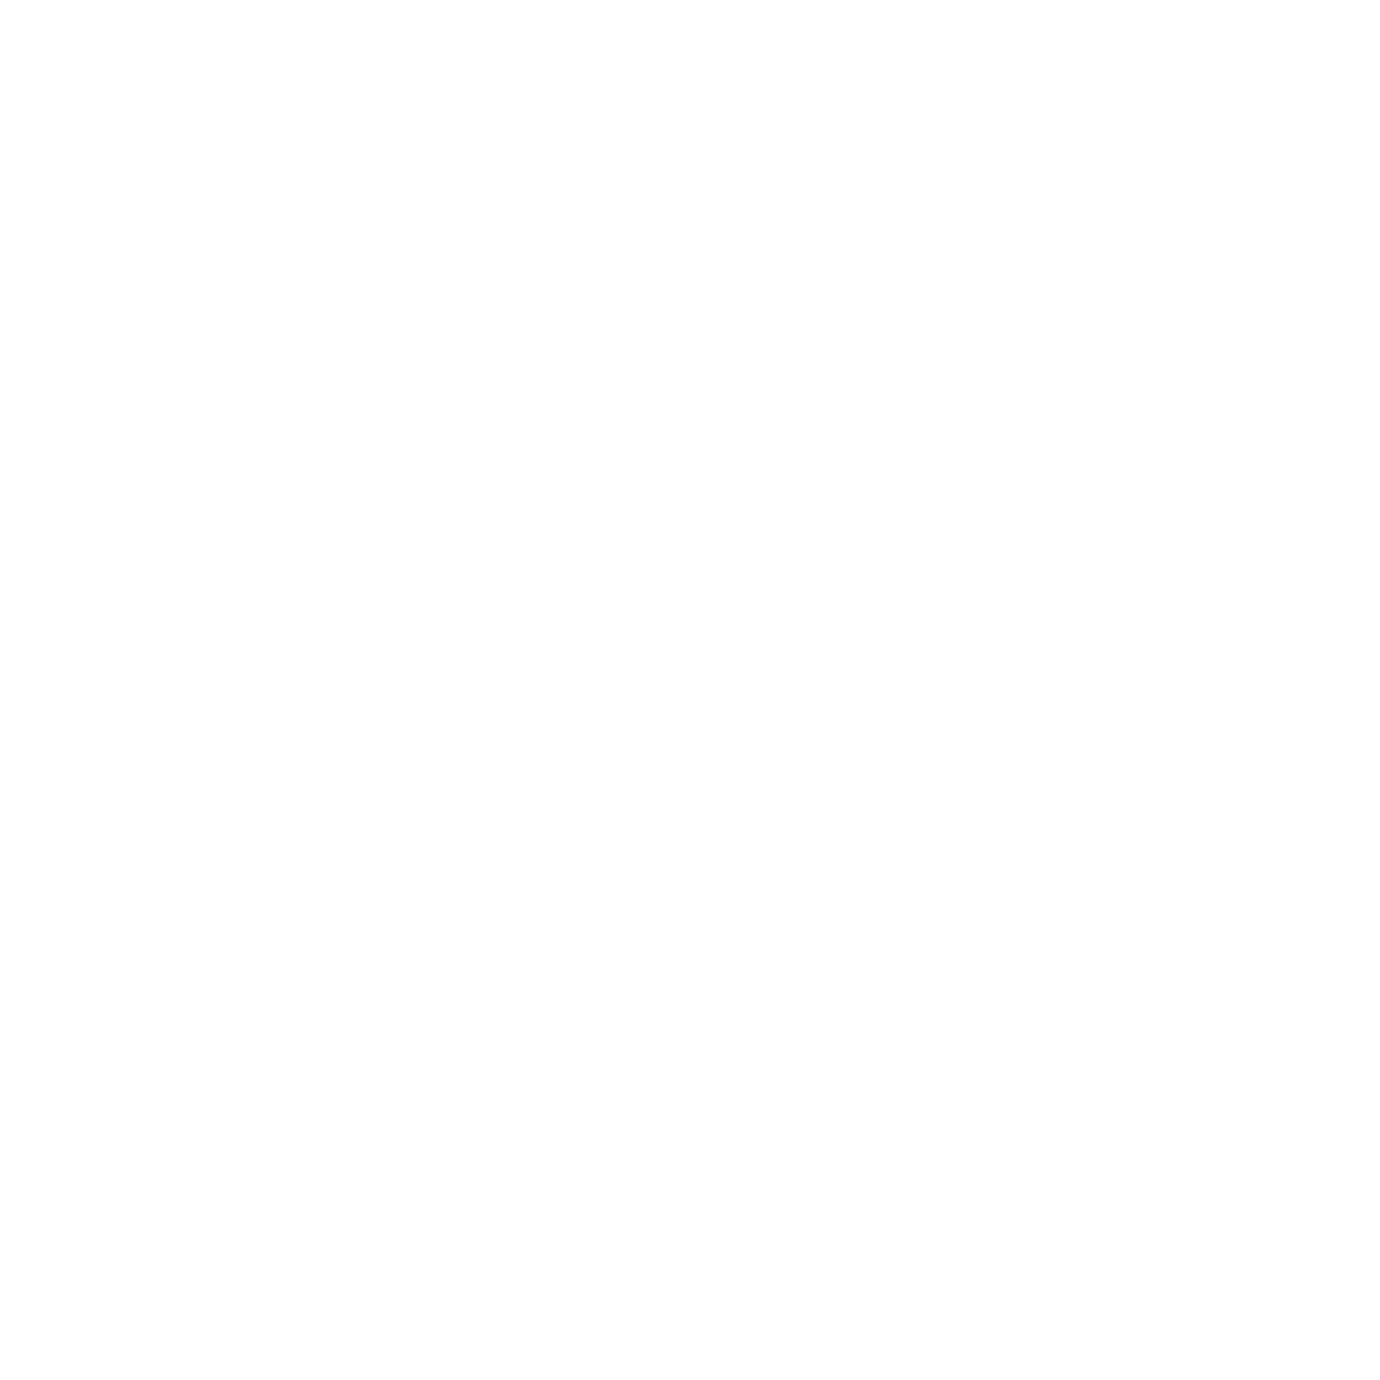

In [32]:
%matplotlib notebook
sns.set(font_scale=0.35)
# fig = plt.figure()
g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True )
plt.savefig('Clustermap_out_germinal_slices_cm1.png',format='png', dpi=1200)

<IPython.core.display.Javascript object>


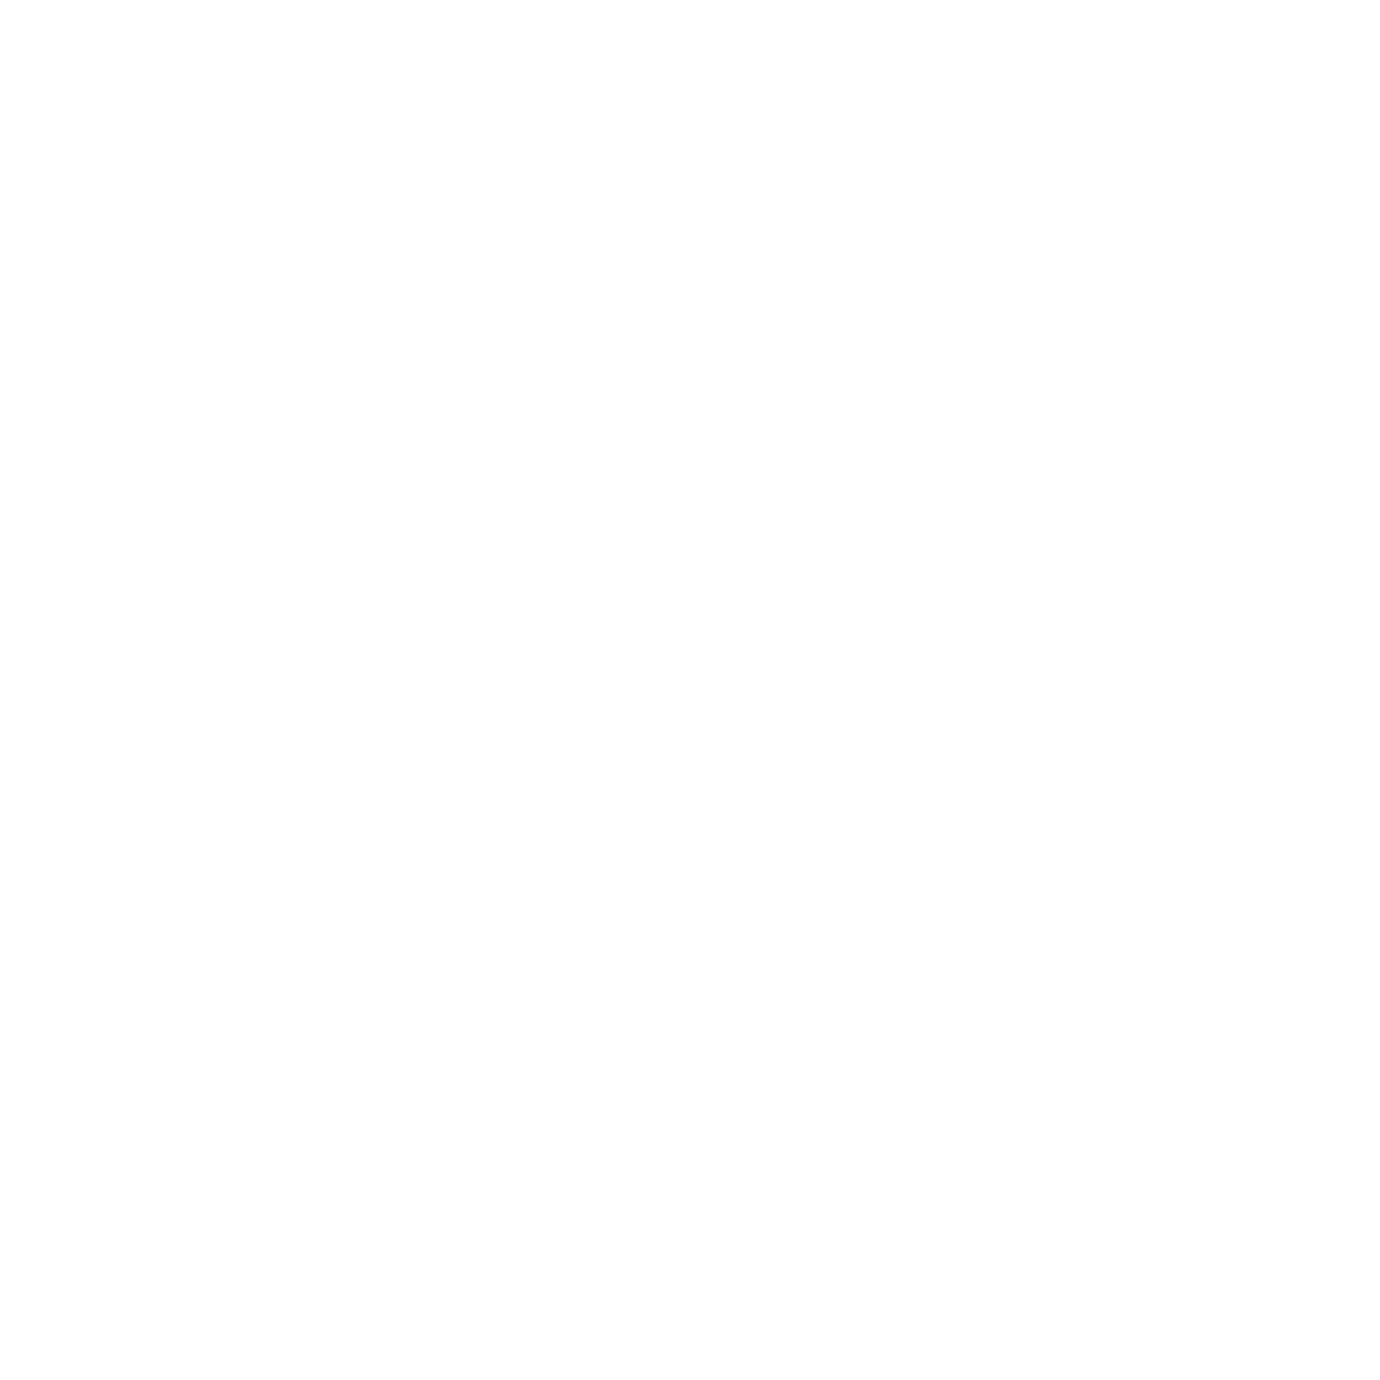

In [33]:
%matplotlib notebook
sns.set(font_scale=0.35)
# fig = plt.figure()
g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True, cmap = 'brg')
plt.savefig('Clustermap_out_germinal_slices_cm2.png',format='png', dpi=1200)

<IPython.core.display.Javascript object>


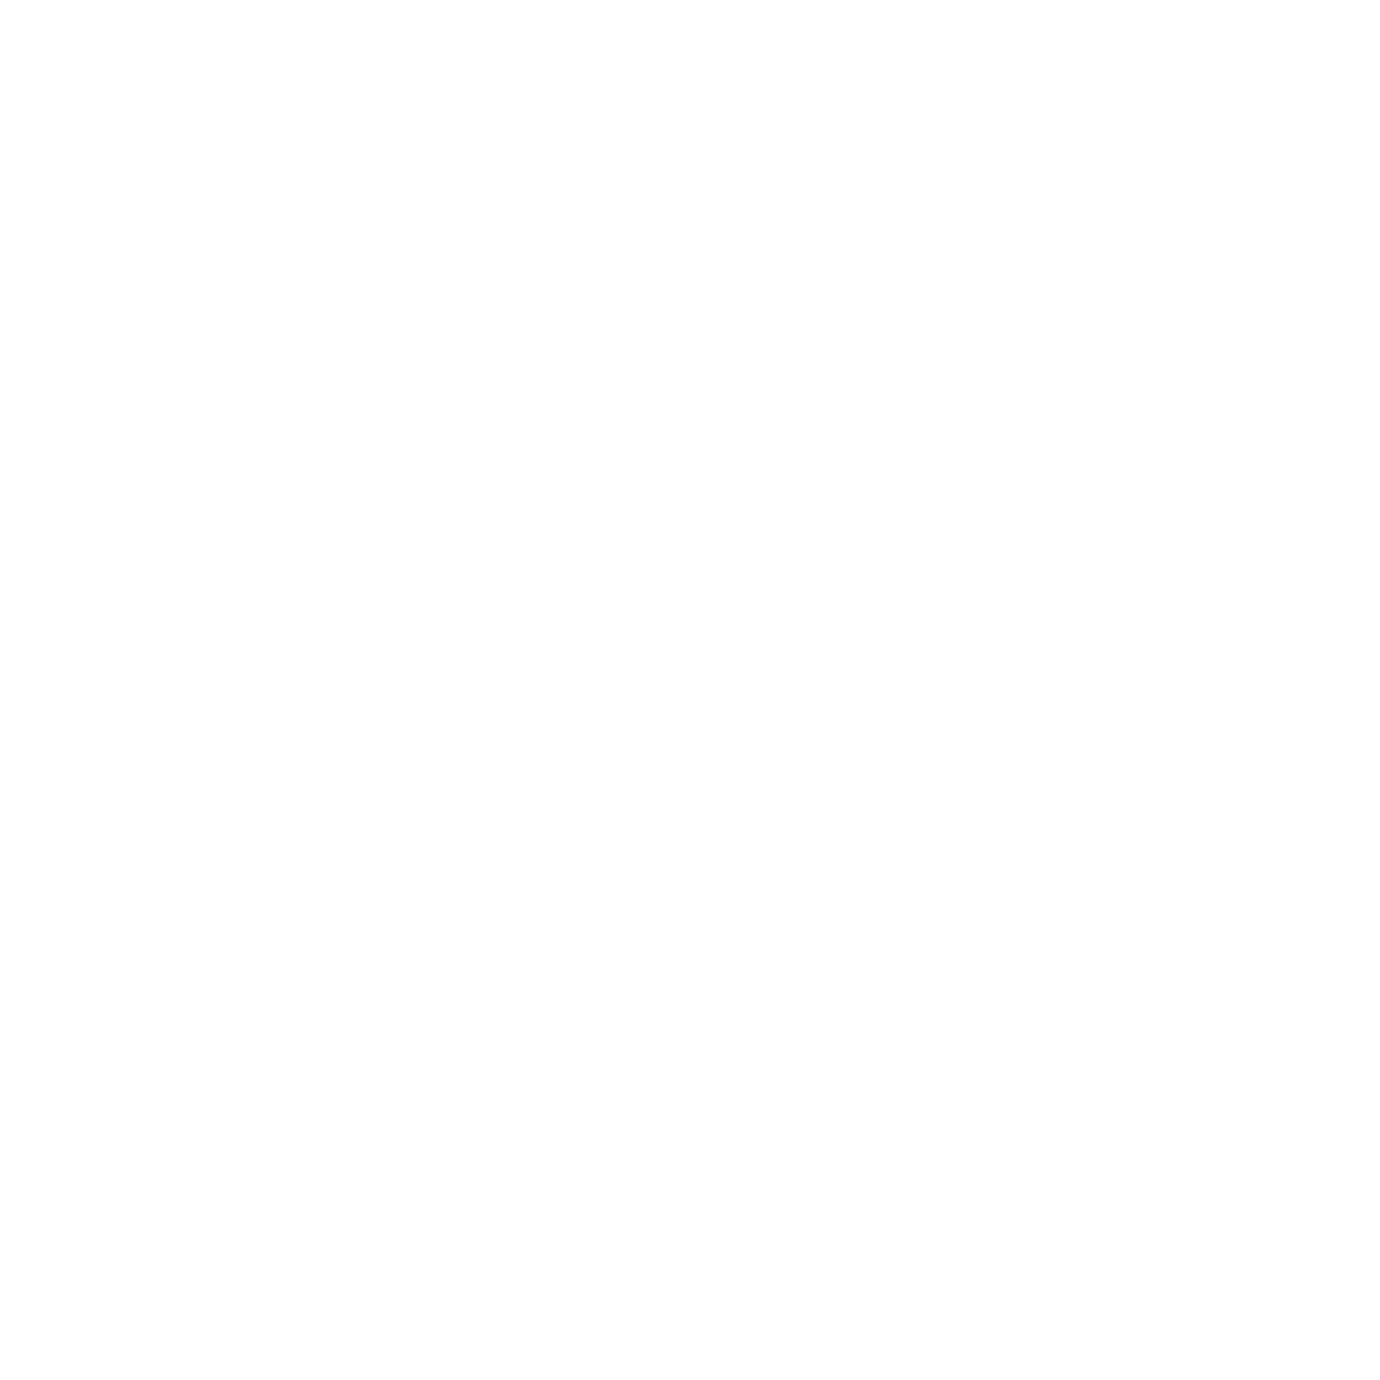

In [34]:
%matplotlib notebook
sns.set(font_scale=0.35)
# fig = plt.figure()
g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True, cmap = 'ocean' )
plt.savefig('Clustermap_out_germinal_slices_cm3.png',format='png', dpi=1200)

<IPython.core.display.Javascript object>


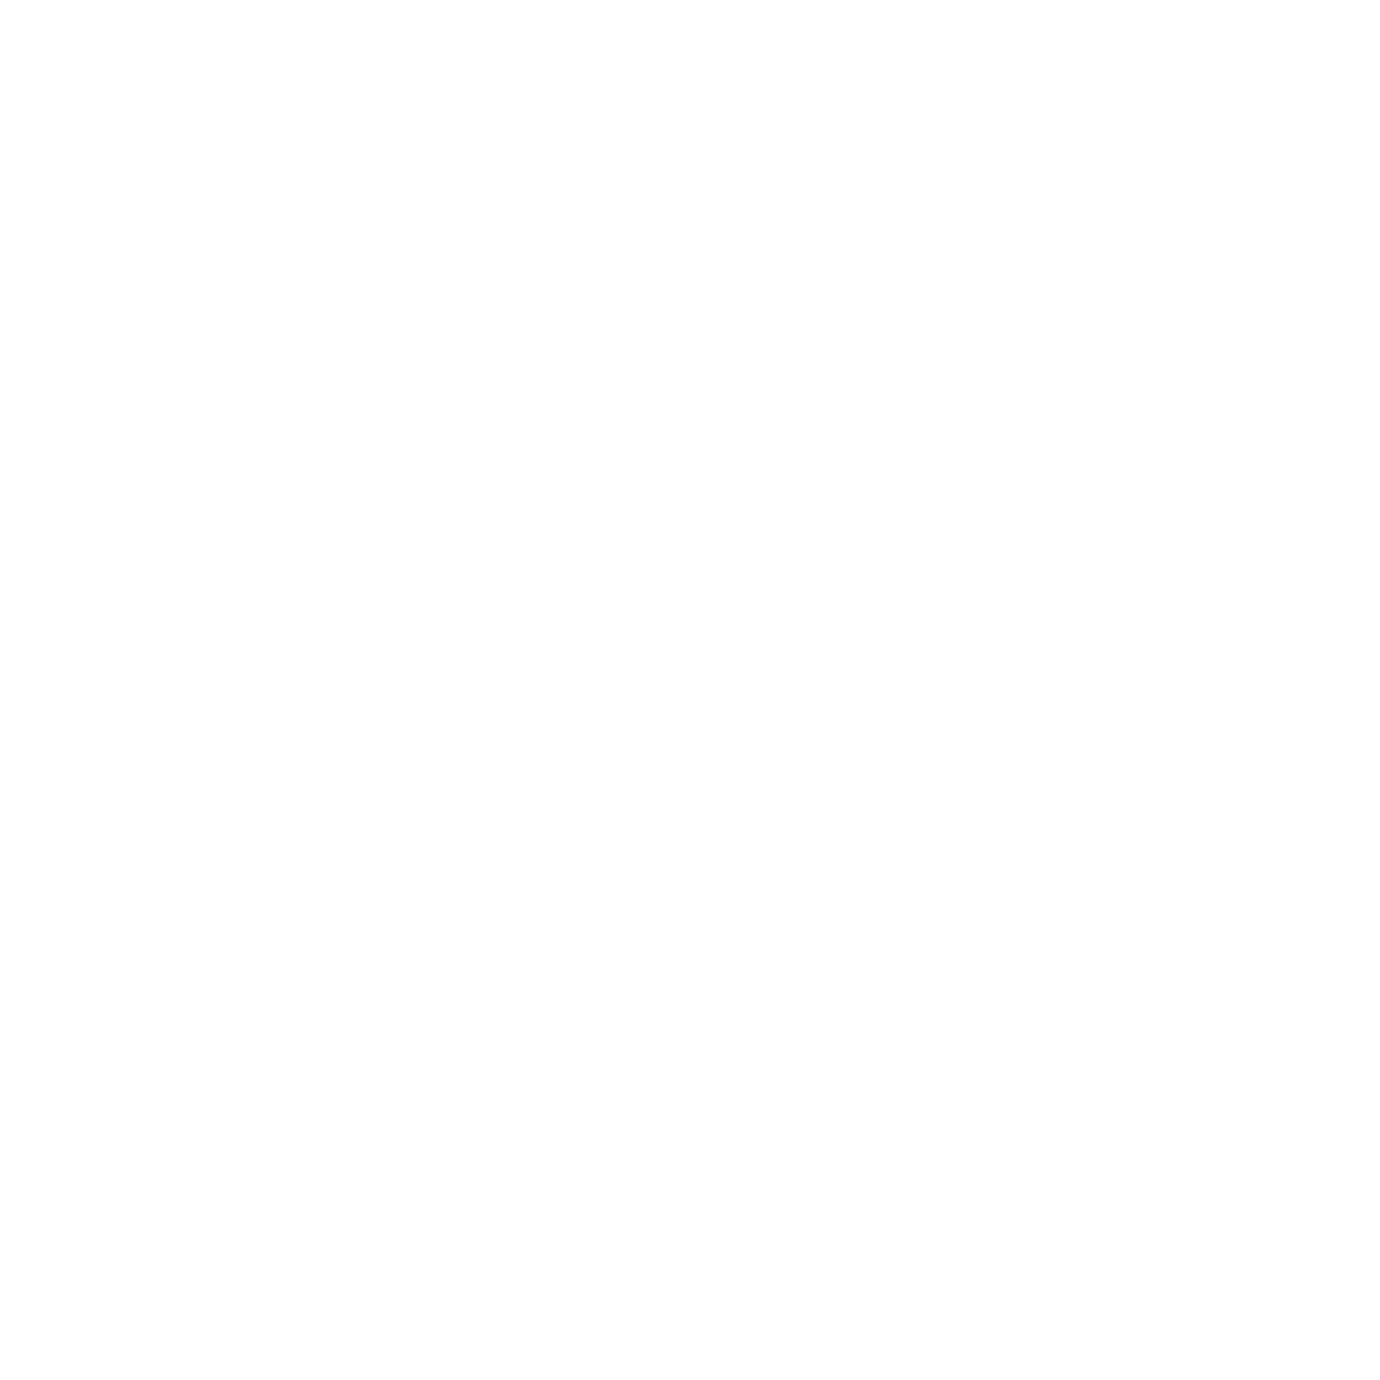

In [35]:
%matplotlib notebook
sns.set(font_scale=0.35)
# fig = plt.figure()
g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True, cmap = 'jet' )
plt.savefig('Clustermap_out_germinal_slices_cm4.png',format='png', dpi=1200)

In [38]:
heat_map_c1 = [sum(final_c1_zero),sum(final_c1_one),sum(final_c1_two),sum(final_c1_three),sum(final_c1_four),sum(final_c1_five)]
heat_map_c2 = [sum(final_c2_zero),sum(final_c2_one),sum(final_c2_two),sum(final_c2_three),sum(final_c2_four),sum(final_c2_five)]
heat_map_c3 = [sum(final_c3_zero),sum(final_c3_one),sum(final_c3_two),sum(final_c3_three),sum(final_c3_four),sum(final_c3_five)]
heat_map_c4 = [sum(final_c4_zero),sum(final_c4_one),sum(final_c4_two),sum(final_c4_three),sum(final_c4_four),sum(final_c4_five)]
heat_map_c5 = [sum(final_c5_zero),sum(final_c5_one),sum(final_c5_two),sum(final_c5_three),sum(final_c5_four),sum(final_c5_five)]

# X = pd.DataFrame({'c1': heat_map_c1, 'c2': heat_map_c2,'c3': heat_map_c3,'c4' : heat_map_c4})
# X = np.log(X)

biomarkers = ["c1","c2","c3","c4","c5"]
clusters = ["first", "second", "third",
           "fourth", "fifth", "sixth"]

# pixel_values = np.c_[heat_map_iod,heat_map_phos,heat_map_rna]
# pixel_values.transpose()

from numpy import inf

# ## this is log transformation 
heat_map_c1 = np.log(heat_map_c1)
heat_map_c1 = np.where(heat_map_c1== -inf , 0, heat_map_c1)

heat_map_c2 = np.log(heat_map_c2)
heat_map_c2 = np.where(heat_map_c2 == -inf , 0, heat_map_c2)

heat_map_c3 = np.log(heat_map_c3)
heat_map_c3 = np.where(heat_map_c3 == -inf , 0, heat_map_c3)

heat_map_c4 = np.log(heat_map_c4)
heat_map_c4 = np.where(heat_map_c4 == -inf , 0, heat_map_c4)

heat_map_c5 = np.log(heat_map_c5)
heat_map_c5 = np.where(heat_map_c5 == -inf , 0, heat_map_c5)


X = pd.DataFrame({'c1': heat_map_c1, 'c2': heat_map_c2,'c3': heat_map_c3,'c4' : heat_map_c4,'c5' : heat_map_c5})

from scipy.stats import zscore
X = X.apply(zscore)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


In [137]:
# import pandas as pd
# from sklearn import preprocessing

# x = X.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# X = pd.DataFrame(x_scaled)
# X = X.transpose()

In [142]:
# X=(X-X.min())/(X.max()-X.min())

# Z-score Map

<IPython.core.display.Javascript object>


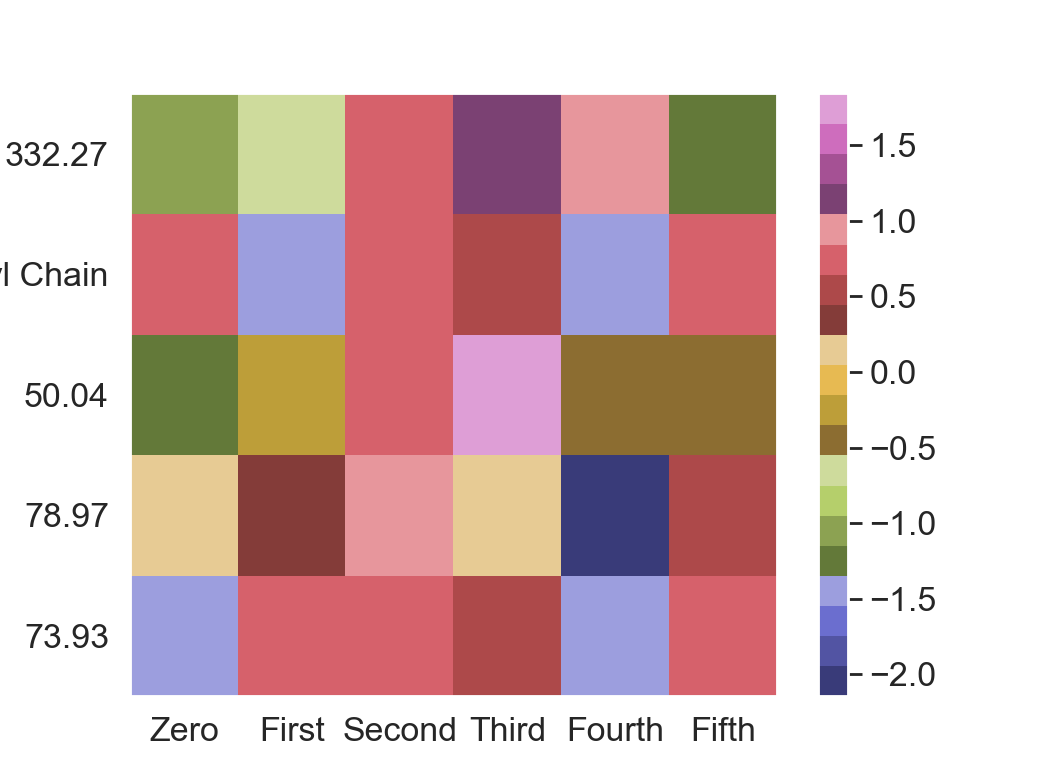

In [43]:
X = X.transpose()
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
X = X
columns = ["Zero", "First", "Second",
           "Third","Fourth", "Fifth"]
index = ["73.93","78.97","50.04","Acyl Chain", "332.27"]
plt.pcolor(X,cmap = 'tab20b')
plt.yticks(np.arange(0.5, len(index), 1), index, fontsize = 15)
plt.xticks(np.arange(0.5, len(columns), 1), columns, fontsize =15)
ax.tick_params(labelsize=15)
plt.colorbar()
fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=15)
plt.show()
plt.savefig("Unlabelled- Heatmap_5.png", bbox_inches='tight')

<IPython.core.display.Javascript object>


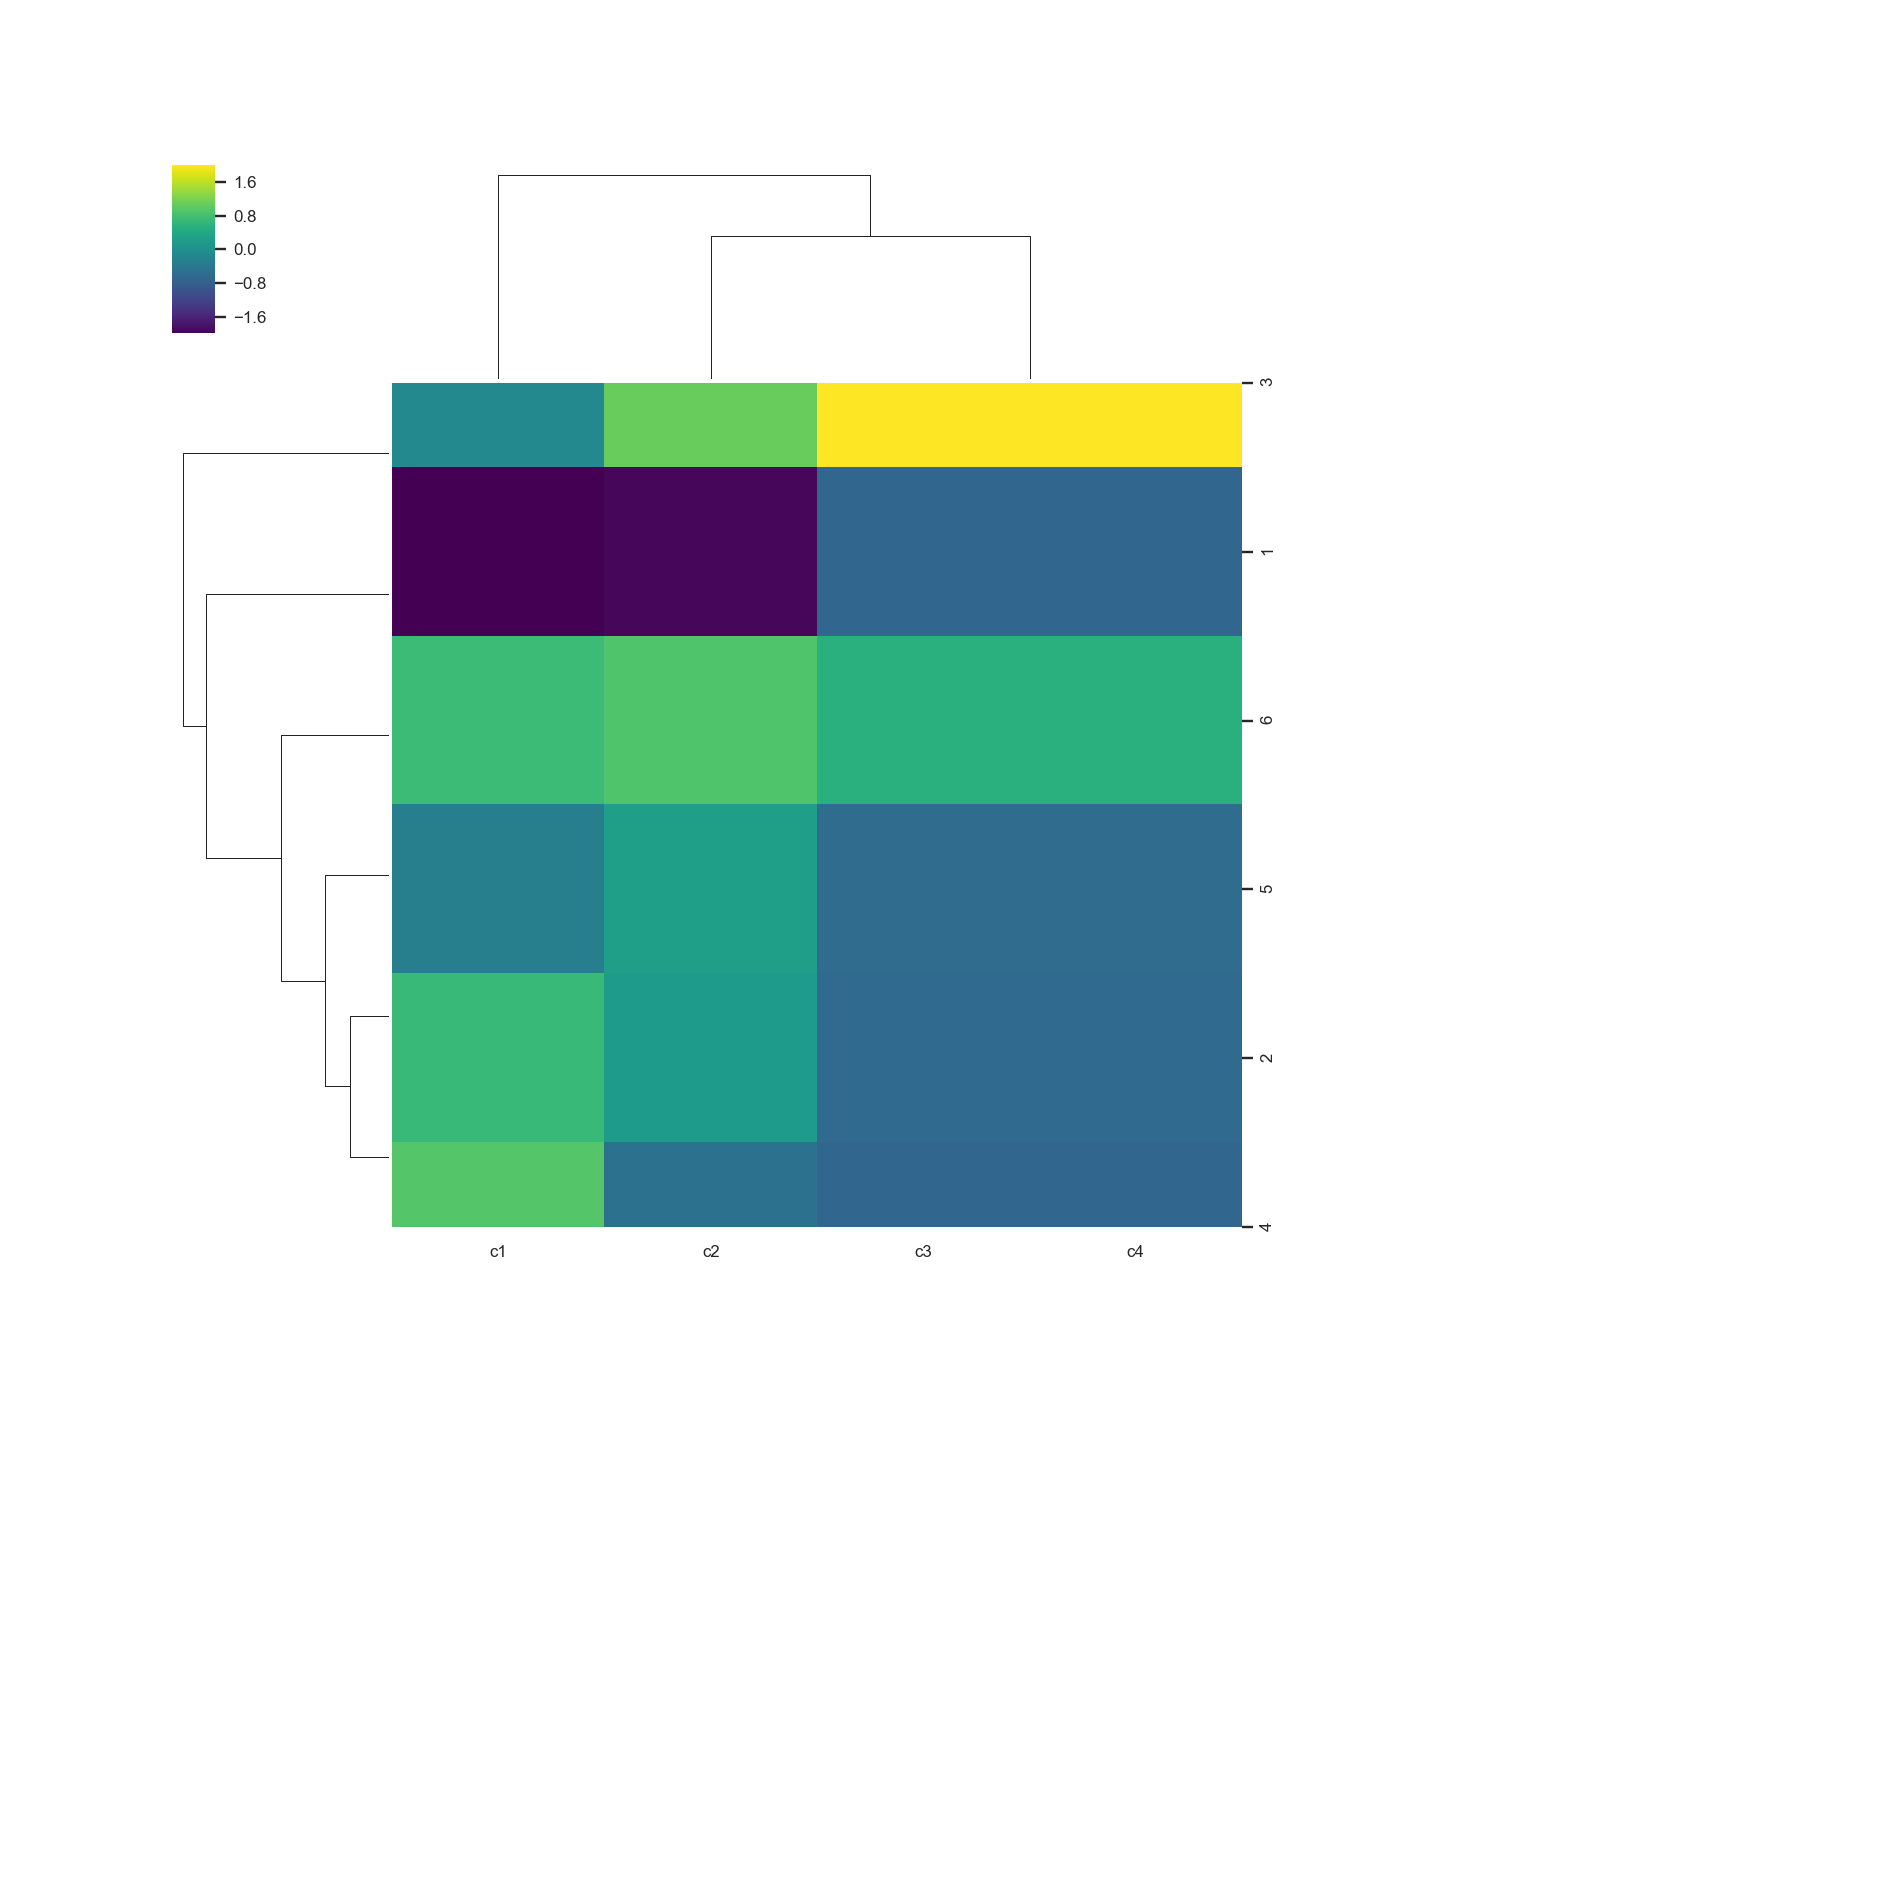

In [43]:
import scipy
c1_zscore= scipy.stats.zscore(heat_map_c1, axis = 0)
c2_zscore= scipy.stats.zscore(heat_map_c2, axis = 0)
c3_zscore= scipy.stats.zscore(heat_map_c3, axis = 0)
c4_zscore= scipy.stats.zscore(heat_map_c4, axis = 0)
X_zscore = pd.DataFrame({'c1': c1_zscore, 'c2':c2_zscore,'c3': c3_zscore,'c4': c4_zscore})
name = ['1','2','3','4','5','6']
X_zscore['Name'] = name
X_zscore = X_zscore.set_index('Name')
del X_zscore.index.name

cbar_kws = {"shrink":1}
# Cluster map without standardisation
# fig = plt.figure()
sns.set(font_scale=0.8)
g = sns.clustermap(X_zscore,cmap="viridis")

plt.savefig('clustermap_out_germinal_clusters_compounds.png',format='png', dpi=1200)
#PLease replace colours with 'w'

my_colors = ['c', 'b', 'r', 'r', 'g', 'k', 'b']

# for ticklabel, tickcolor in zip(g.ax_heatmap.axes.get_yticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)

# for ticklabel, tickcolor in zip(g.ax_heatmap.axes.get_xticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)

# hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
#Cluster map with Standardisation
#sns.clustermap(X_zscore,standard_scale = 1,cmap="viridis")

In [110]:
os.chdir(results_store_path)

In [47]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = zero_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = 'blue' , alpha= 0.2 ,s = 0.0001 )
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_0.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


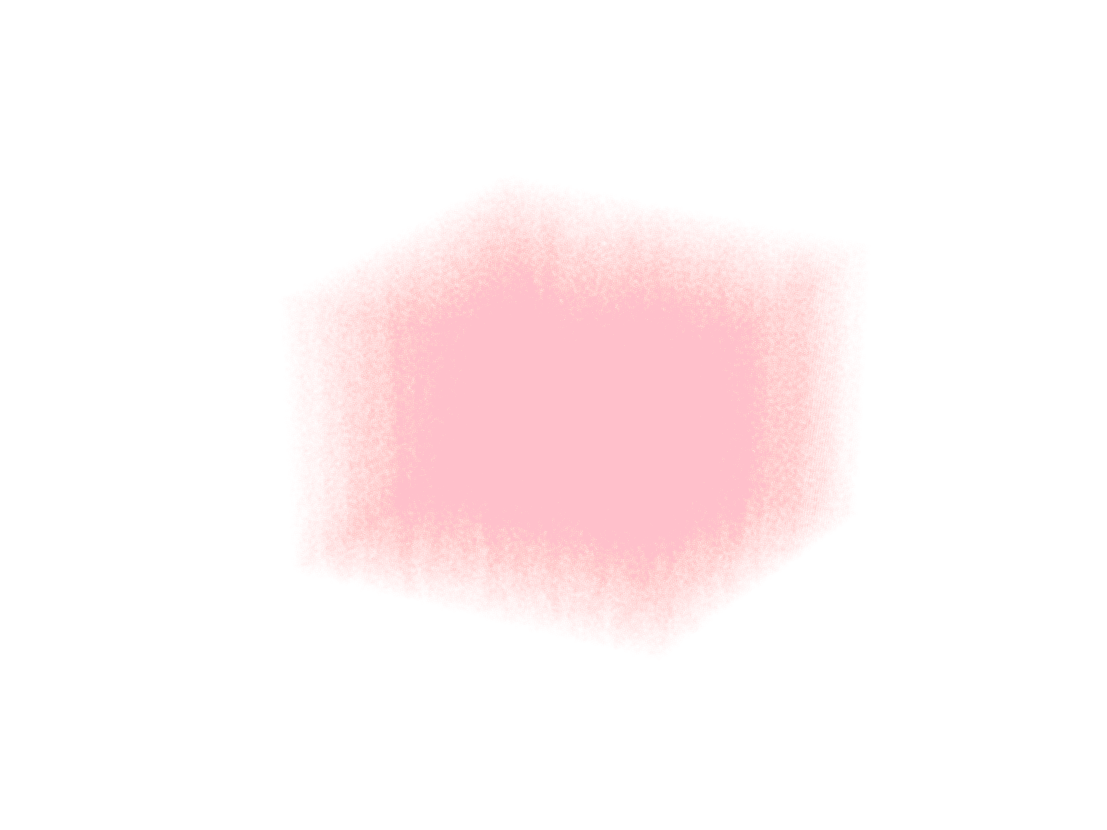

In [52]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = one_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = "pink" , alpha= 0.2 ,s = 0.0001)

# # First remove fill
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
# ax.grid(False)
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_1.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


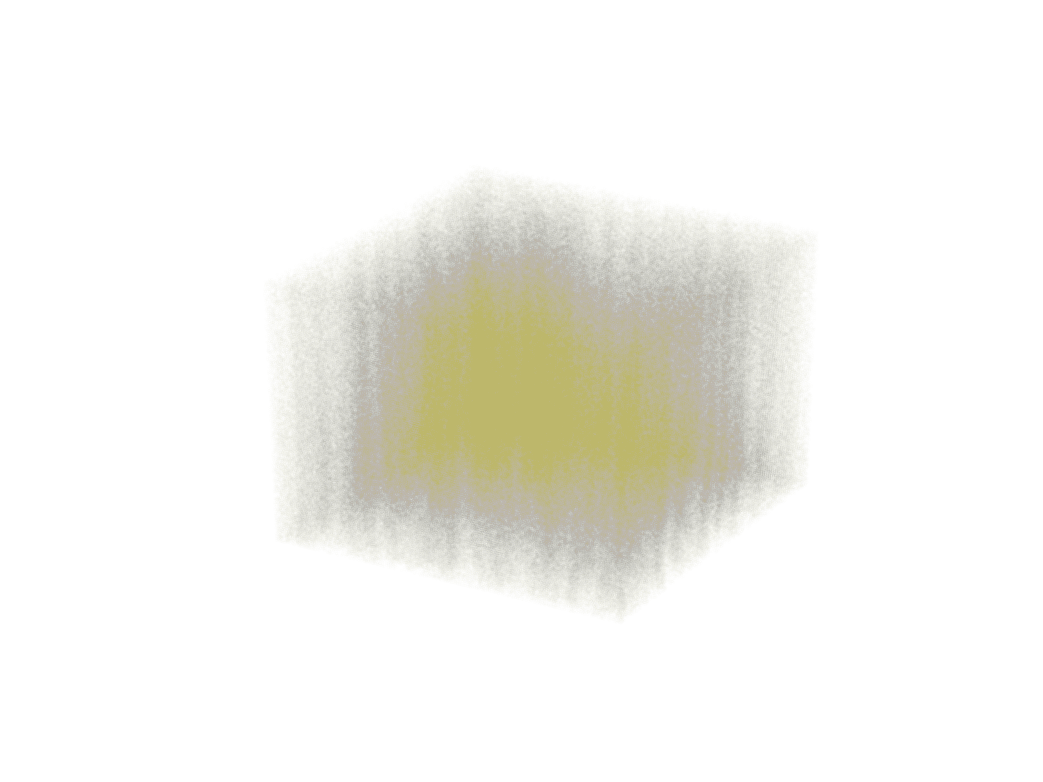

In [41]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = two_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = '#BDB76B' , alpha= 0.1 ,s = 0.0006
                  )



# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_2.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


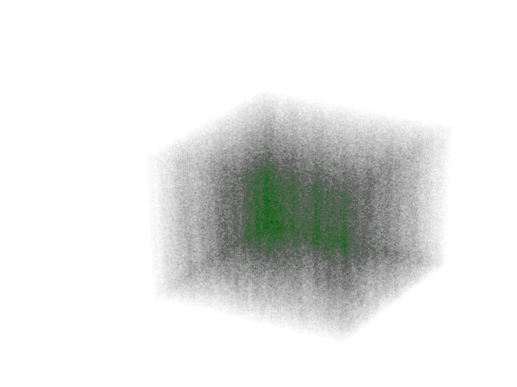

In [123]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = three_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = '#006400' , alpha= 0.1 ,s = 0.0008)

# fig.colorbar(img)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig("cluster_3.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


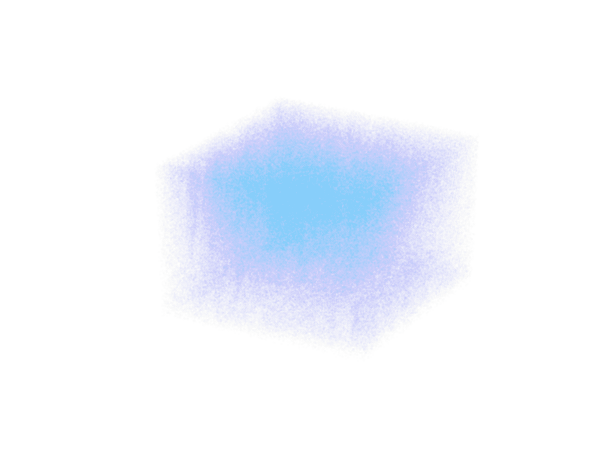

In [62]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = four_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = '#87CEFA' , alpha= 0.2 ,s = 0.0007)

#fig.colorbar(img)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_4.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


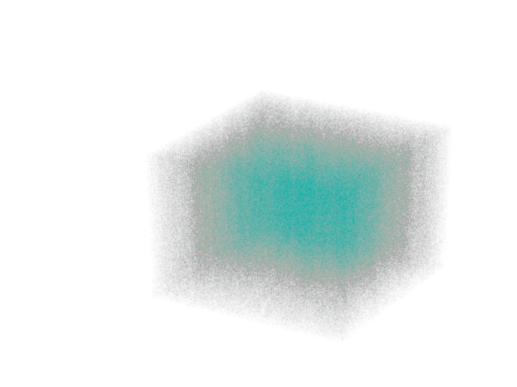

In [124]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = five_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = '#20B2AA' , alpha= 0.1 ,s = 0.0008)

#fig.colorbar(img)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_5.png", bbox_inches='tight')

plt.show()

In [111]:
x_list = px[c1]
y_list = py[c1]
z_list = pz[c1]

<IPython.core.display.Javascript object>


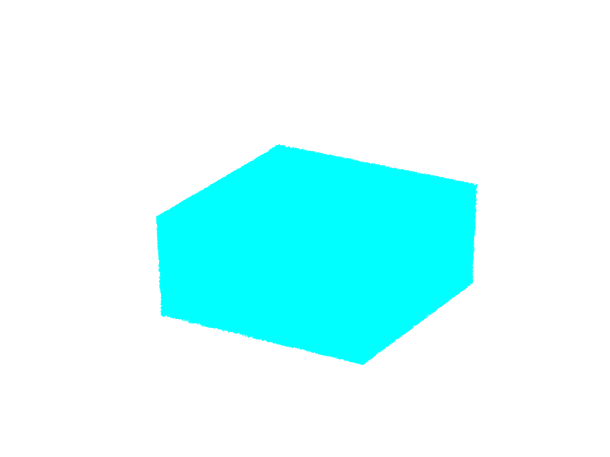

In [35]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cluster = one_indices
c = final_c1_one

img = ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c = c ,alpha= 1, cmap='cool',s = 0.1)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig("final_c2_two.png", bbox_inches='tight')
plt.show()

In [203]:
os.chdir(results_store_path)

# 3D visualizations of clusters overlapping with compounds

In [53]:
x_list = px[c1]
y_list = py[c1]
z_list = pz[c1]
[x_list[i] for i in cluster]

[4.0,
 27.0,
 30.0,
 35.0,
 40.0,
 52.0,
 75.0,
 105.0,
 117.0,
 118.0,
 133.0,
 136.0,
 145.0,
 147.0,
 150.0,
 158.0,
 161.0,
 176.0,
 178.0,
 188.0,
 191.0,
 203.0,
 210.0,
 214.0,
 220.0,
 229.0,
 244.0,
 247.0,
 249.0,
 252.0,
 254.0,
 9.0,
 10.0,
 12.0,
 19.0,
 35.0,
 42.0,
 53.0,
 56.0,
 84.0,
 101.0,
 102.0,
 105.0,
 109.0,
 114.0,
 127.0,
 144.0,
 146.0,
 151.0,
 160.0,
 163.0,
 167.0,
 172.0,
 178.0,
 179.0,
 214.0,
 219.0,
 226.0,
 230.0,
 235.0,
 239.0,
 243.0,
 247.0,
 252.0,
 1.0,
 2.0,
 10.0,
 14.0,
 37.0,
 39.0,
 40.0,
 48.0,
 50.0,
 55.0,
 64.0,
 70.0,
 93.0,
 94.0,
 96.0,
 107.0,
 108.0,
 111.0,
 113.0,
 133.0,
 153.0,
 197.0,
 198.0,
 232.0,
 237.0,
 246.0,
 251.0,
 252.0,
 253.0,
 255.0,
 2.0,
 6.0,
 9.0,
 26.0,
 31.0,
 36.0,
 38.0,
 41.0,
 79.0,
 83.0,
 90.0,
 93.0,
 101.0,
 107.0,
 113.0,
 120.0,
 127.0,
 133.0,
 139.0,
 149.0,
 157.0,
 164.0,
 170.0,
 175.0,
 203.0,
 225.0,
 226.0,
 235.0,
 240.0,
 242.0,
 246.0,
 253.0,
 1.0,
 4.0,
 7.0,
 10.0,
 16.0,
 77.0,
 84

In [ ]:
fig = plt.figure()
ax = Axes3D(fig) 
cluster = _indices
c = final_c2_

x_list= px[c1]
y_list= py[c1]
z_list = pz[c1]

p = wow_c2_2

ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c,s = 0.01,color = 'yellow', alpha = 0.1)
ax.scatter3D(p[:,0], p[:,1], p[:,2],s = 0.004,color = "black", alpha = 0.08)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("final_c2_2.png", bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure()
ax = Axes3D(fig) 
cluster = three_indices
c = final_c3_three

x_list= px[c1]
y_list= py[c1]
z_list = pz[c1]

p = wow_c3_3

ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c,s = 0.01,color = 'yellow', alpha = 0.1)
ax.scatter3D(p[:,0], p[:,1], p[:,2],s = 0.004,color = "black", alpha = 0.08)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("final_c3_3.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


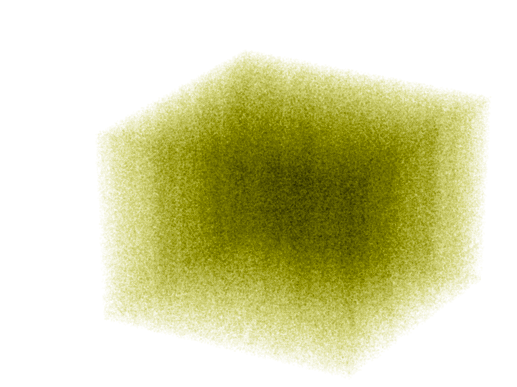

In [119]:
fig = plt.figure()
ax = Axes3D(fig) 
cluster = zeros_indices
c = final_c4_zero

x_list= px[c1]
y_list= py[c1]
z_list = pz[c1]

p = wow_c4_0

ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c,s = 0.01,color = 'yellow', alpha = 0.1)
ax.scatter3D(p[:,0], p[:,1], p[:,2],s = 0.004,color = "black", alpha = 0.08)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("final_c4_0.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


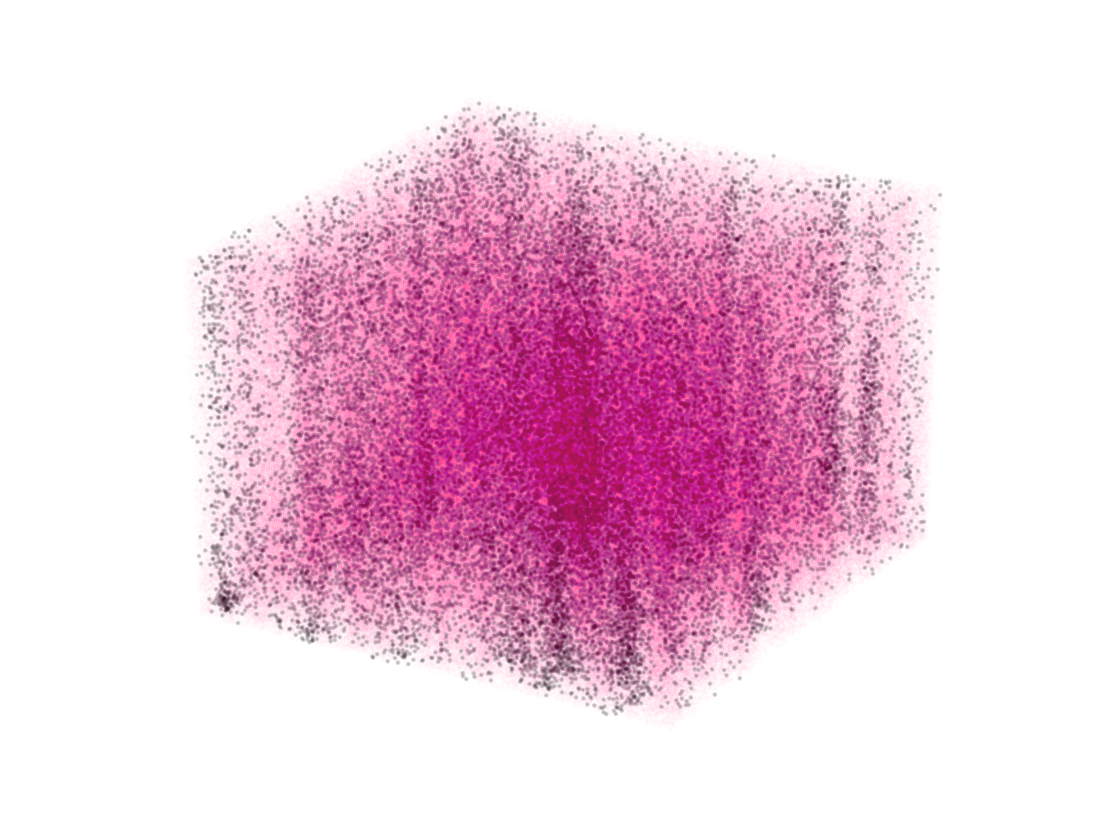

In [50]:
fig = plt.figure()
ax = Axes3D(fig) 
cluster =two_indices
c = final_c5_two

x_list= px[c1]
y_list= py[c1]
z_list = pz[c1]

p = wow_c5_2

ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c,s = 0.005,color = '#FF1493', alpha = 0.08)
ax.scatter3D(p[:,0], p[:,1], p[:,2],s = 0.9,color = "black", alpha = 0.15)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("final_c5_2.png", bbox_inches='tight')
plt.show()

In [65]:
def compute_cluster_pixels(px,py,pz,pv,c1,zero_array,pixel_zero_c1):
    A = np.c_[px[c1],py[c1],pz[c1]]
    B = zero_array
    coord_list = [tuple(c) for c in A]
    coord_subs = [tuple(c) for c in B]
    pixel_dict = {}
    for coord in coord_list:
        pixel_dict[coord] = 0
    for i, coord in enumerate(coord_subs):
        pixel_dict[coord] = pixel_zero_c1[i]
    return list(pixel_dict.values())

In [66]:
re_pixel_zero_c1 = compute_cluster_pixels(px,py,pz,pv,c1,zero_array,pixel_zero_c1)
re_pixel_zero_c2 = compute_cluster_pixels(px,py,pz,pv,c2,zero_array,pixel_zero_c2)#
re_pixel_zero_c3 = compute_cluster_pixels(px,py,pz,pv,c3,zero_array,pixel_zero_c3)#
re_pixel_zero_c4 = compute_cluster_pixels(px,py,pz,pv,c4,zero_array,pixel_zero_c4)#
re_pixel_zero_c5 = compute_cluster_pixels(px,py,pz,pv,c5,zero_array,pixel_zero_c5)#

In [67]:
re_pixel_one_c1 = compute_cluster_pixels(px,py,pz,pv,c1,one_array,pixel_one_c1)
re_pixel_one_c2 = compute_cluster_pixels(px,py,pz,pv,c2,one_array,pixel_one_c2)
re_pixel_one_c3 = compute_cluster_pixels(px,py,pz,pv,c3,one_array,pixel_one_c3)
re_pixel_one_c4 = compute_cluster_pixels(px,py,pz,pv,c4,one_array,pixel_one_c4)
re_pixel_one_c5 = compute_cluster_pixels(px,py,pz,pv,c5,one_array,pixel_one_c5)

In [68]:
re_pixel_two_c1 = compute_cluster_pixels(px,py,pz,pv,c1,two_array,pixel_two_c1)
re_pixel_two_c2 = compute_cluster_pixels(px,py,pz,pv,c2,two_array,pixel_two_c2)
re_pixel_two_c3 = compute_cluster_pixels(px,py,pz,pv,c3,two_array,pixel_two_c3)
re_pixel_two_c4 = compute_cluster_pixels(px,py,pz,pv,c4,two_array,pixel_two_c4)
re_pixel_two_c5 = compute_cluster_pixels(px,py,pz,pv,c5,two_array,pixel_two_c5)

In [69]:
re_pixel_three_c1 = compute_cluster_pixels(px,py,pz,pv,c1,three_array,pixel_three_c1)
re_pixel_three_c2 = compute_cluster_pixels(px,py,pz,pv,c2,three_array,pixel_three_c2)
re_pixel_three_c3 = compute_cluster_pixels(px,py,pz,pv,c3,three_array,pixel_three_c3)
re_pixel_three_c4 = compute_cluster_pixels(px,py,pz,pv,c4,three_array,pixel_three_c4)
re_pixel_three_c5 = compute_cluster_pixels(px,py,pz,pv,c5,three_array,pixel_three_c5)

In [70]:
re_pixel_four_c1 = compute_cluster_pixels(px,py,pz,pv,c1,four_array,pixel_four_c1)
re_pixel_four_c2 = compute_cluster_pixels(px,py,pz,pv,c2,four_array,pixel_four_c2)
re_pixel_four_c3 = compute_cluster_pixels(px,py,pz,pv,c3,four_array,pixel_four_c3)
re_pixel_four_c4 = compute_cluster_pixels(px,py,pz,pv,c4,four_array,pixel_four_c4)
re_pixel_four_c5 = compute_cluster_pixels(px,py,pz,pv,c5,four_array,pixel_four_c5)

In [71]:
re_pixel_five_c1 = compute_cluster_pixels(px,py,pz,pv,c1,five_array,pixel_five_c1)
re_pixel_five_c2 = compute_cluster_pixels(px,py,pz,pv,c2,five_array,pixel_five_c2)
re_pixel_five_c3 = compute_cluster_pixels(px,py,pz,pv,c3,five_array,pixel_five_c3)
re_pixel_five_c4 = compute_cluster_pixels(px,py,pz,pv,c4,five_array,pixel_five_c4)
re_pixel_five_c5 = compute_cluster_pixels(px,py,pz,pv,c5,five_array,pixel_five_c5)

In [47]:
import scipy

# Metrics

In [48]:
scipy.stats.pearsonr(pv[c1],re_pixel_zero_c1)

(0.13605990767398335, 0.0)

In [49]:
scipy.stats.pearsonr(pv[c2],re_pixel_zero_c2)

(0.10786333370436056, 0.0)

In [50]:
scipy.stats.pearsonr(pv[c3],re_pixel_zero_c3)

(0.6295734476525225, 0.0)

In [51]:
scipy.stats.pearsonr(pv[c4],re_pixel_zero_c4)

(0.21370664492076533, 0.0)

In [52]:
scipy.stats.pearsonr(pv[c1],re_pixel_one_c1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(nan, nan)

In [53]:
scipy.stats.pearsonr(pv[c2],re_pixel_one_c2)

(nan, nan)

In [54]:
scipy.stats.pearsonr(pv[c3],re_pixel_one_c3)

(-0.07311725342680349, 0.0)

In [55]:
scipy.stats.pearsonr(pv[c4],re_pixel_one_c4)

(nan, nan)

In [56]:
scipy.stats.pearsonr(pv[c1],re_pixel_two_c1)

(0.2445353944649986, 0.0)

In [57]:
scipy.stats.pearsonr(pv[c2],re_pixel_two_c2)

(0.9327611385902953, 0.0)

In [58]:
scipy.stats.pearsonr(pv[c3],re_pixel_two_c3)

(0.25474836520630095, 0.0)

In [59]:
scipy.stats.pearsonr(pv[c4],re_pixel_two_c4)

(0.31955011225742597, 0.0)

In [60]:
scipy.stats.pearsonr(pv[c1],re_pixel_three_c1)

(0.6190306217113566, 0.0)

In [61]:
scipy.stats.pearsonr(pv[c2],re_pixel_three_c2)

(0.13414338271915063, 0.0)

In [62]:
scipy.stats.pearsonr(pv[c3],re_pixel_three_c3)

(0.14874439746552276, 0.0)

In [63]:
scipy.stats.pearsonr(pv[c4],re_pixel_three_c4)

(nan, nan)

In [64]:
scipy.stats.pearsonr(pv[c1],re_pixel_four_c1)

(0.5590603845710026, 0.0)

In [65]:
scipy.stats.pearsonr(pv[c2],re_pixel_four_c2)

(0.19675877358349736, 0.0)

In [66]:
scipy.stats.pearsonr(pv[c3],re_pixel_four_c3)

(0.204953272225615, 0.0)

In [67]:
scipy.stats.pearsonr(pv[c4],re_pixel_four_c4)

(0.5273456772296682, 0.0)

In [68]:
scipy.stats.pearsonr(pv[c1],re_pixel_five_c1)

(nan, nan)

In [69]:
scipy.stats.pearsonr(pv[c2],re_pixel_five_c2)

(0.08904824589998392, 0.0)

In [70]:
scipy.stats.pearsonr(pv[c3],re_pixel_five_c3)

(0.019348515843136883, 0.0)

In [71]:
scipy.stats.pearsonr(pv[c4],re_pixel_five_c4)

(0.5568420419701703, 0.0)

In [72]:
np.mean(pixel_zero_c1),np.std(pixel_zero_c1)

np.mean(pixel_zero_c2),np.std(pixel_zero_c2)

np.mean(pixel_zero_c3),np.std(pixel_zero_c3)

np.mean(pixel_zero_c4),np.std(pixel_zero_c4)

np.mean(pixel_one_c1),np.std(pixel_one_c1)

np.mean(pixel_one_c2),np.std(pixel_one_c2)

np.mean(pixel_one_c3),np.std(pixel_one_c3)

np.mean(pixel_one_c4),np.std(pixel_one_c4)

np.mean(pixel_two_c1),np.std(pixel_two_c1)

np.mean(pixel_two_c2),np.std(pixel_two_c2)

np.mean(pixel_two_c3),np.std(pixel_two_c3)

np.mean(pixel_two_c4),np.std(pixel_two_c4)

np.mean(pixel_three_c1),np.std(pixel_three_c1)

np.mean(pixel_three_c2),np.std(pixel_three_c2)

np.mean(pixel_three_c3),np.std(pixel_three_c3)

np.mean(pixel_three_c4),np.std(pixel_three_c4)

np.mean(pixel_four_c1),np.std(pixel_four_c1)

np.mean(pixel_four_c2),np.std(pixel_four_c2)

np.mean(pixel_four_c3),np.std(pixel_four_c3)

np.mean(pixel_four_c4),np.std(pixel_four_c4)

np.mean(pixel_five_c1),np.std(pixel_five_c1)

np.mean(pixel_five_c2),np.std(pixel_five_c2)

np.mean(pixel_five_c3),np.std(pixel_five_c3)

np.mean(pixel_five_c4),np.std(pixel_five_c4)

np.mean(pv[c1]),np.std(pv[c1])

np.mean(pv[c2]),np.std(pv[c2])

np.mean(pv[c3]),np.std(pv[c3])

np.mean(pv[c4]),np.std(pv[c4])

(0.5332159512284873, 0.7400468356627835)

In [73]:
np.mean(re_pixel_zero_c1),np.std(re_pixel_zero_c1)

(0.02603713325832201, 0.16202453728093733)

In [74]:
np.mean(re_pixel_zero_c2),np.std(re_pixel_zero_c2)

(0.005666760430819746, 0.0750672401303018)

In [75]:
np.mean(re_pixel_zero_c3),np.std(re_pixel_zero_c3)

(0.5332926874575408, 1.349733291235384)

In [246]:
np.mean(re_pixel_zero_c4),np.std(re_pixel_zero_c4)

(0.004635961432206004, 0.06904678654007504)

In [247]:
np.mean(re_pixel_one_c1),np.std(re_pixel_one_c1)

(0.0, 0.0)

In [248]:
np.mean(re_pixel_one_c2),np.std(re_pixel_one_c2)

(0.0, 0.0)

In [249]:
np.mean(re_pixel_one_c3),np.std(re_pixel_one_c3)

(0.0, 0.0)

In [250]:
np.mean(re_pixel_one_c4),np.std(re_pixel_one_c4)

(0.0, 0.0)

In [251]:
np.mean(re_pixel_two_c1),np.std(re_pixel_two_c1)

(1.2949893349095395e-05, 0.0035985727239223157)

In [252]:
np.mean(re_pixel_two_c2),np.std(re_pixel_two_c2)

(2.0077354029605262e-07, 0.0004480775602348739)

In [253]:
np.mean(re_pixel_two_c3),np.std(re_pixel_two_c3)

(0.24249859860068873, 0.5324818370352702)

In [254]:
np.mean(re_pixel_two_c4),np.std(re_pixel_two_c4)


(1.0038677014802632e-05, 0.0031683712282127153)

In [255]:
np.mean(re_pixel_three_c1),np.std(re_pixel_three_c1)

(0.025268655074270147, 0.16032306599934526)

In [256]:
np.mean(re_pixel_three_c2),np.std(re_pixel_three_c2)

(0.0, 0.0)

In [257]:
np.mean(re_pixel_three_c3),np.std(re_pixel_three_c3)

(1.7567684775904607e-05, 0.004191345386908004)

In [258]:
np.mean(re_pixel_three_c4),np.std(re_pixel_three_c4)

(0.13628226832339638, 0.40834241797340926)

In [259]:
np.mean(re_pixel_four_c1),np.std(re_pixel_four_c1)

(0.08751849124306127, 0.3429865400454507)

In [260]:
np.mean(re_pixel_four_c2),np.std(re_pixel_four_c2)

(0.00012739081131784538, 0.01133042146614667)

In [261]:
np.mean(re_pixel_four_c3),np.std(re_pixel_four_c3)

(0.08683736700760691, 0.3387358891479017)

In [262]:
np.mean(re_pixel_four_c4),np.std(re_pixel_four_c4)

(0.002086237857216283, 0.045864681522620174)

In [263]:
np.mean(re_pixel_five_c1),np.std(re_pixel_five_c1)

(0.015353453786749589, 0.12704987327454376)

In [264]:
np.mean(re_pixel_five_c2),np.std(re_pixel_five_c2)

(0.006234419973273026, 0.07968907315584818)

In [265]:
np.mean(re_pixel_five_c3),np.std(re_pixel_five_c3)

(0.07711721721448396, 0.322712241085458)

In [266]:
np.mean(re_pixel_five_c4),np.std(re_pixel_five_c4)

(0.073691819843493, 0.30845015711959656)

In [267]:
scipy.spatial.distance.correlation(pv[c1],re_pixel_five_c1)

0.8456338856420196

In [72]:
from sklearn.metrics import f1_score

In [73]:
f1_score(pv[c1], re_pixel_zero_c1, average='macro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.09663705618618179

In [74]:
f1_score(pv[c1], re_pixel_one_c1, average='macro')

0.7314177384953611

In [75]:
f1_score(pv[c1], re_pixel_two_c1, average='macro')

0.16696817994177757

In [76]:
f1_score(pv[c1], re_pixel_three_c1, average='macro')

0.1199629508495723

In [77]:
f1_score(pv[c1], re_pixel_four_c1, average='macro')

0.09663705618618179

In [78]:
f1_score(pv[c1], re_pixel_five_c1, average='macro')

0.555451828367618

In [79]:
f1_score(pv[c2], re_pixel_zero_c2, average='macro')

0.13072334240363717

In [80]:
f1_score(pv[c2], re_pixel_one_c2, average='macro')

0.13782242828247457

In [81]:
f1_score(pv[c2], re_pixel_two_c2, average='macro')

0.9817061596607398

In [82]:
f1_score(pv[c2], re_pixel_three_c2, average='macro')

0.13341328427200982

In [83]:
f1_score(pv[c2], re_pixel_four_c2, average='macro')

0.1248741108620437

In [84]:
f1_score(pv[c2], re_pixel_five_c2, average='macro')

0.1521097502453181

In [85]:
f1_score(pv[c3], re_pixel_zero_c3, average='macro')

0.09757522099931987

In [86]:
f1_score(pv[c3], re_pixel_one_c3, average='macro')

0.13465969211065645

In [87]:
f1_score(pv[c3], re_pixel_two_c3, average='macro')

0.205768703675649

In [88]:
f1_score(pv[c3], re_pixel_three_c3, average='macro')

0.6614735411977389

In [89]:
f1_score(pv[c3], re_pixel_four_c3, average='macro')

0.11645664899649058

In [90]:
f1_score(pv[c3], re_pixel_five_c3, average='macro')

0.15701838048808872

In [91]:
f1_score(pv[c4], re_pixel_zero_c4, average='macro')

0.6705434371042273

In [92]:
f1_score(pv[c4], re_pixel_one_c4, average='macro')

0.08263249984669618

In [93]:
f1_score(pv[c4], re_pixel_two_c4, average='macro')

0.26064080746762375

In [94]:
f1_score(pv[c4], re_pixel_three_c4, average='macro')

0.13597494378692232

In [95]:
f1_score(pv[c4], re_pixel_four_c4, average='macro')

0.08263249984669618

In [96]:
f1_score(pv[c4], re_pixel_five_c4, average='macro')

0.5264757325838504

In [97]:
f1_score(pv[c5], re_pixel_one_c5, average='macro')

0.2718051586058099

In [98]:
f1_score(pv[c5], re_pixel_two_c5, average='macro')

0.811220564505079

In [99]:
f1_score(pv[c5], re_pixel_three_c5, average='macro')

0.3444753731112909

In [100]:
f1_score(pv[c5], re_pixel_four_c5, average='macro')

0.27436932352993304

In [101]:
f1_score(pv[c5], re_pixel_five_c5, average='macro')

0.29241013243198244

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pv[c5], re_pixel_five_c5))